# Agenda
- Vokabular
- Reichhaltigkeit
- Filtern nach Länge
- Frequency distribution
- Bigrams 
- Concordance
- Ähnlichkeit
- Dispersionsplot
- Wordcloud 2.0

In [5]:
import nltk

In [6]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Vokabular
- Wie groß ist das Vokabular von Moby Dick?

In [7]:
a = [1,3,3,5]
len(set(a))

3

In [8]:
len(set(text1))

19317

### Aufgabe

- Das von Sense and Sensibility von Jane Austen?

In [9]:
#dein code hier

- Und das Vokabular der Menschenrechtserklärung?

In [10]:
from nltk.corpus import udhr
nltk.download("punkt")
sample = (" ").join(udhr.words("German_Deutsch-Latin1"))
tokens = nltk.word_tokenize(sample)
menschenrechtserklaerungs_text = nltk.Text(tokens)
#dein code hier

[nltk_data] Downloading package punkt to /Users/plotti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Reichhaltigkeit
- Welcher text ist am reichhaltigesten d.h. das größte Vokabular pro Wort?
- Maximaler Quotient ist 1: 100 verschiedene wörter / 100 wörter insgesammt = 1

In [11]:
# Moby Dick
len(set(text1)) / float(len(text1))

0.07406285585022564

### Aufgabe

In [12]:
# Jane Austen
# dein code hier

In [13]:
# Menschenrechtserklärung
# dein code hier

# Filtern 
- nach Wörtern bestimmter länge

In [14]:
# Moby Dick
V = set(text1)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['CIRCUMNAVIGATION',
 'Physiognomically',
 'apprehensiveness',
 'cannibalistically',
 'characteristically',
 'circumnavigating',
 'circumnavigation',
 'circumnavigations',
 'comprehensiveness',
 'hermaphroditical',
 'indiscriminately',
 'indispensableness',
 'irresistibleness',
 'physiognomically',
 'preternaturalness',
 'responsibilities',
 'simultaneousness',
 'subterraneousness',
 'supernaturalness',
 'superstitiousness',
 'uncomfortableness',
 'uncompromisedness',
 'undiscriminating',
 'uninterpenetratingly']

### Aufgabe

In [15]:
# Menschenrechtserklärung
# Was sind die längsten wörter dort? 
# dein code hier

## Filtern nach Länge und Frequenz

In [34]:
fdist1 = FreqDist(text1)
fdist1[","]

18713

In [45]:
# Wörter die in Moby Dick mind. 12 buchstaben lang sind und mind. 8 mal vorkommen
fdist1 = FreqDist(menschenrechtserklaerungs_text)
sorted(w for w in set(menschenrechtserklaerungs_text) if len(w) > 5 and fdist1[w] > 5)

['Anspruch',
 'Artikel',
 'Freiheit',
 'Menschen',
 'Menschenrechte',
 'Niemand',
 'Rechte',
 'Schutz',
 'gleichen',
 'seiner',
 'werden']

# Verteilung
- Welches Wort kommt in Moby Dick am häufigsten vor?
- Hier z.B. die Lyrics des Hits "Versace" von Migos: https://www.youtube.com/watch?v=rF-hq_CHNH0 :) 

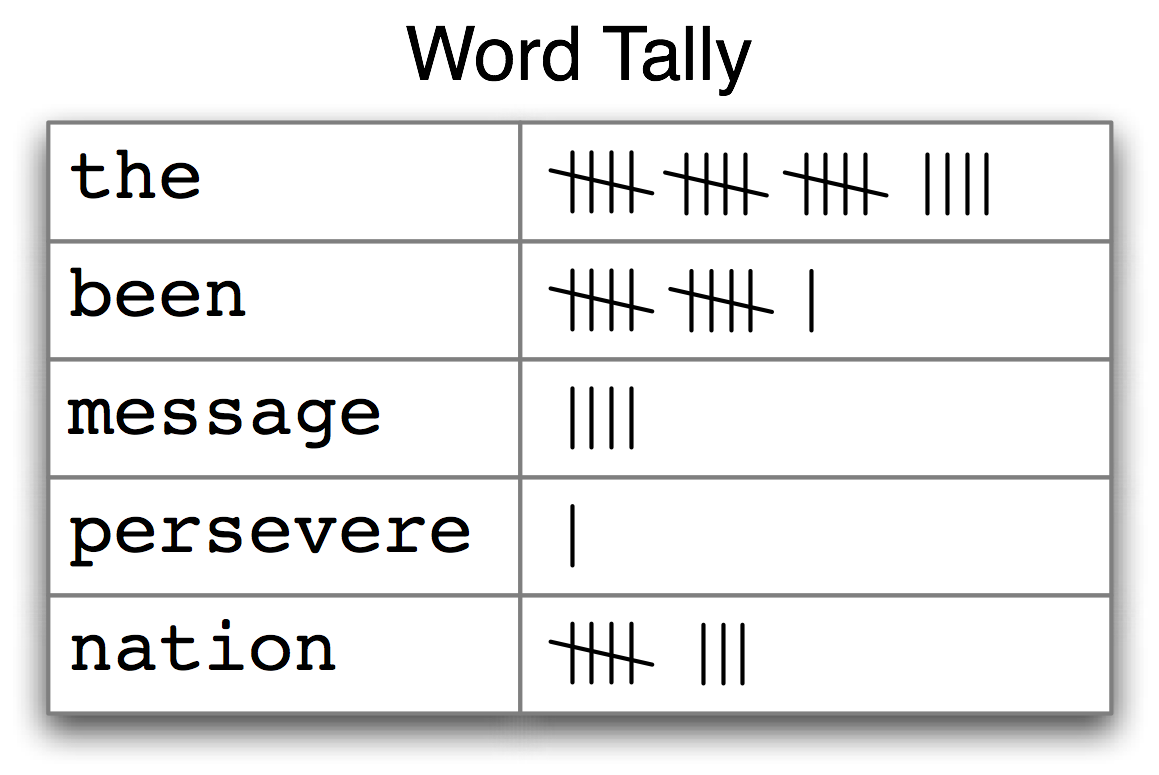

In [28]:
from IPython.display import Image
Image("frequency.png", width=300)

- Welche Wörter kommen am häufigsten bei Moby Dick vor?

In [18]:
fdist = FreqDist(text1)
fdist

FreqDist({',': 18713, 'the': 13721, '.': 6862, 'of': 6536, 'and': 6024, 'a': 4569, 'to': 4542, ';': 4072, 'in': 3916, 'that': 2982, ...})

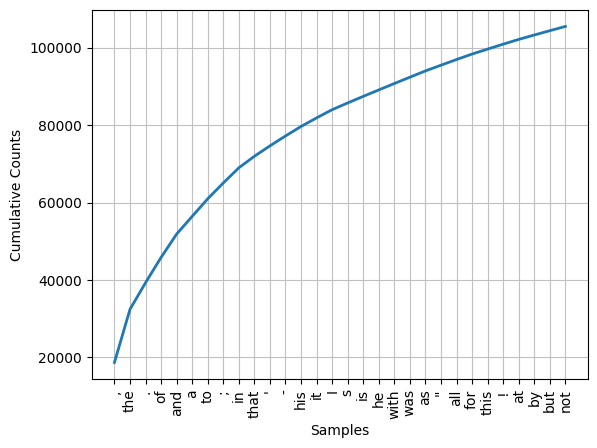

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [19]:
fdist.plot(30, cumulative=True)

- Jedes zusätzliche Wort kommt immer weniger oft vor (diminishing returns)
- Welches Wort kommt in meinem Satz am häufigsten vor?

In [21]:
sample = '''Ich war heute im wald spazieren und sah ein Reh. Wobeich ich nicht sicher war ob es ein Reh war oder ein Geist.'''

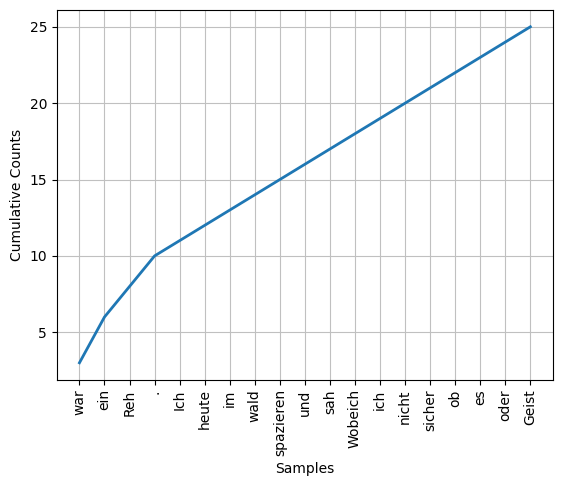

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [22]:
tokens = nltk.word_tokenize(sample)
text = nltk.Text(tokens)
fdist = FreqDist(text)
fdist.plot(30, cumulative=True)

In [23]:
fdist

FreqDist({'war': 3, 'ein': 3, 'Reh': 2, '.': 2, 'Ich': 1, 'heute': 1, 'im': 1, 'wald': 1, 'spazieren': 1, 'und': 1, ...})

### Aufgabe
- Erzeugt eigenen Text oder kopiert ihn aus dem Internet und zählt welche Wörter am häufigsten vorkommen, sind die ersten 3 Positionen bei Euch ähnlich? Warum?

# Bigrams
- Welche Wörter kommen häufig zusammen vor?
- Böhmerman hatte vor ein paar Jahren aus den häufigsten Phrasen einen Popsong gemacht https://www.youtube.com/watch?v=h8MVXC_hqNY

In [24]:
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


In [25]:
menschenrechtserklaerungs_text.collocations()

das Recht; Jeder hat; hat das; Niemand darf; Recht auf; Anspruch auf;
Vereinten Nationen; dem Gesetz; auf Grund; Alle Menschen; strafbaren
Handlung; auf gleichen; Allgemeine Erklärung; wegen einer; gegen jede;
der Menschenrechte; notwendig ist; des Landes; diese Erklärung; hat
Anspruch


### Aufgabe
- Welche Bigramms kommen am häufigsten bei einem beliebigen Text von 20min.ch vor?

### Advanced Trigrams

- Bigramme mit Frequenz in der Menschenrechtserklärung

In [56]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_words(menschenrechtserklaerungs_text)
finder.apply_freq_filter(3) # reduce to bigrams that appeared at least 3 times
finder.nbest(bigram_measures.pmi, 10) 

[('hat', 'das', 'Recht'),
 ('Jeder', 'hat', 'das'),
 ('.', 'Niemand', 'darf'),
 ('das', 'Recht', 'auf'),
 ('hat', 'Anspruch', 'auf'),
 ('Jeder', 'hat', 'Anspruch'),
 ('werden', '.', 'Artikel'),
 ('.', 'Jeder', 'hat'),
 (',', 'da', 'die'),
 ('das', 'Recht', ',')]

- Trigramme in der Menschenrechtserklärung
- mehr Beispiele unter http://www.nltk.org/howto/collocations.html

In [57]:
finder = TrigramCollocationFinder.from_words(menschenrechtserklaerungs_text)
finder.apply_freq_filter(3) # reduce to bigrams that appeared at least 3 times
finder.nbest(trigram_measures.pmi, 10)

[('hat', 'das', 'Recht'),
 ('Jeder', 'hat', 'das'),
 ('.', 'Niemand', 'darf'),
 ('das', 'Recht', 'auf'),
 ('hat', 'Anspruch', 'auf'),
 ('Jeder', 'hat', 'Anspruch'),
 ('werden', '.', 'Artikel'),
 ('.', 'Jeder', 'hat'),
 (',', 'da', 'die'),
 ('das', 'Recht', ',')]

# Übereinstimmungen oder Konkordanz

- In welchem Kontext steht überall "monstrous" im Text bei Moby Dick?

In [59]:
text2.concordance("monstrous")

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


- In welchem Kontext kommen Menschenrechte in der Menschenrechtserklärung vor?

In [60]:
menschenrechtserklaerungs_text.concordance("Recht")

Displaying 25 of 28 matches:
kt ist ist . Artikel 3 Jeder hat das Recht auf Leben , Freiheit und Sicherheit 
fen werden . Artikel 6 Jeder hat das Recht , überall als rechtsfähig anerkannt 
 Handlung beschuldigt wird , hat das Recht , als unschuldig zu gelten , solange
nnerstaatlichem oder internationalem Recht nicht strafbar war . Ebenso darf kei
htigungen . Artikel 13 Jeder hat das Recht , sich innerhalb eines Staates frei 
tsort frei zu wählen . Jeder hat das Recht , jedes Land , einschließlich seines
kzukehren . Artikel 14 Jeder hat das Recht , in anderen Ländern vor Verfolgung 
l zu suchen und zu genießen . Dieses Recht kann nicht in Anspruch genommen werd
verstoßen . Artikel 15 Jeder hat das Recht auf eine Staatsangehörigkeit . Niema
igkeit willkürlich entzogen noch das Recht versagt werden , seine Staatsanghöri
sangehörigkeit oder der Religion das Recht zu heiraten und eine Familie zu grün
und Staat . Artikel 17 Jeder hat das Recht , sowohl allein als auch in Gemeinsc
bt werden .

## Ähnlichkeit: Welche Wörter benutzen den gleichen Kontext?
- Bei Moby Dick?

In [61]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


- Bei Jane Austen?

In [62]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


- In der Menschenrechtserkläreung?

In [63]:
menschenrechtserklaerungs_text.similar("Menschenrechte")

gleichen gesellschaft seine ehe organisation arbeitszeit
grundschulunterricht


## Dispersionsplot
- Welche Wörter kommen wann gemeinsam vor?

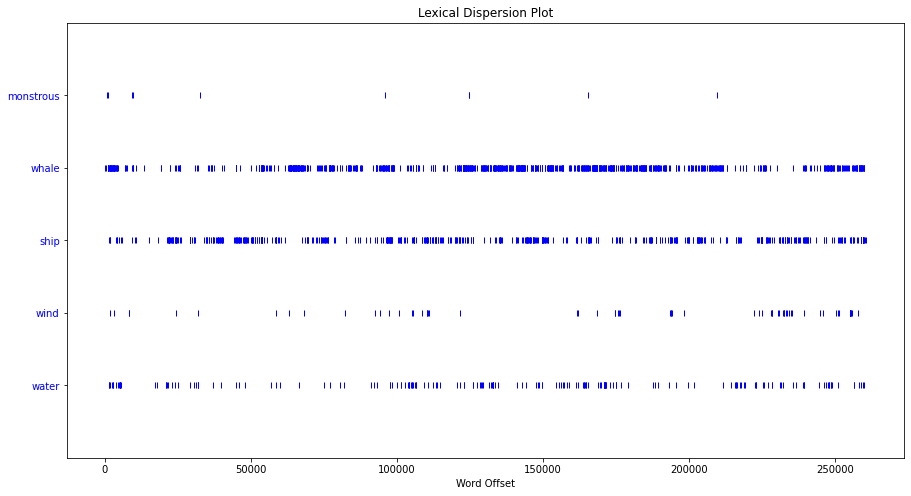

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
text1.dispersion_plot(["monstrous", "whale", "ship", "wind", "water"])

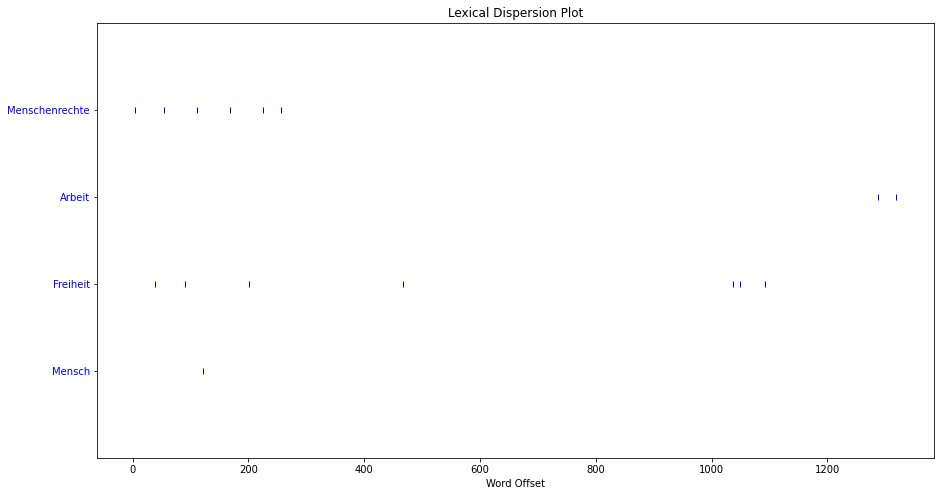

In [65]:
plt.figure(figsize=(15,8))
menschenrechtserklaerungs_text.dispersion_plot(["Menschenrechte", "Arbeit", "Freiheit", "Mensch"])

## Aufgabe:
- Probiert es mal mit einem Dispersionsplot für einen Text eurer Wahl. 

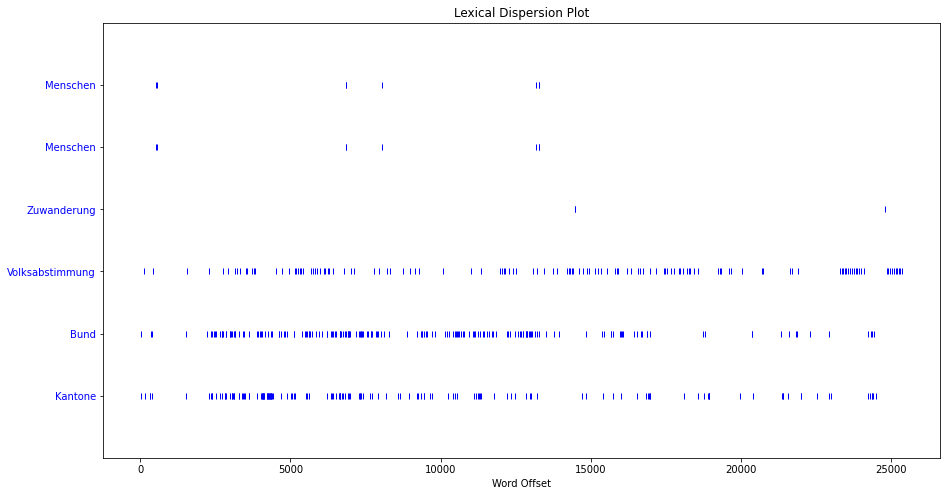

In [75]:
verfassung = '''
101
Bundesverfassung der Schweizerischen Eidgenossenschaft

vom 18. April 1999 (Stand am 1. Januar 2020)
  Präambel

Im Namen Gottes des Allmächtigen!

Das Schweizervolk und die Kantone,

in der Verantwortung gegenüber der Schöpfung,

im Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,

im Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,

im Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,

gewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,

geben sich folgende Verfassung1:

1 Angenommen in der Volksabstimmung vom 18. April 1999 (BB vom 18. Dez. 1998, BRB vom 11. Aug. 1999 – AS 1999 2556; BBl 1997 I 1, 1999 162 5986).
  1. Titel: Allgemeine Bestimmungen
  Art. 1 Schweizerische Eidgenossenschaft

Das Schweizervolk und die Kantone Zürich, Bern, Luzern, Uri, Schwyz, Obwalden und Nidwalden, Glarus, Zug, Freiburg, Solothurn, Basel-Stadt und Basel-Landschaft, Schaffhausen, Appenzell Ausserrhoden und Appenzell Innerrhoden, St. Gallen, Graubünden, Aargau, Thurgau, Tessin, Waadt, Wallis, Neuenburg, Genf und Jura bilden die Schweizerische Eidgenossenschaft.
  Art. 2 Zweck

1 Die Schweizerische Eidgenossenschaft schützt die Freiheit und die Rechte des Volkes und wahrt die Unabhängigkeit und die Sicherheit des Landes.

2 Sie fördert die gemeinsame Wohlfahrt, die nachhaltige Entwicklung, den inneren Zusammenhalt und die kulturelle Vielfalt des Landes.

3 Sie sorgt für eine möglichst grosse Chancengleichheit unter den Bürgerinnen und Bürgern.

4 Sie setzt sich ein für die dauerhafte Erhaltung der natürlichen Lebensgrundlagen und für eine friedliche und gerechte internationale Ordnung.
  Art. 3 Kantone

Die Kantone sind souverän, soweit ihre Souveränität nicht durch die Bundesverfassung beschränkt ist; sie üben alle Rechte aus, die nicht dem Bund übertragen sind.
  Art. 4 Landessprachen

Die Landessprachen sind Deutsch, Französisch, Italienisch und Rätoromanisch.
  Art. 5 Grundsätze rechtsstaatlichen Handelns

1 Grundlage und Schranke staatlichen Handelns ist das Recht.

2 Staatliches Handeln muss im öffentlichen Interesse liegen und verhältnismässig sein.

3 Staatliche Organe und Private handeln nach Treu und Glauben.

4 Bund und Kantone beachten das Völkerrecht.
  Art. 5a1Subsidiarität

Bei der Zuweisung und Erfüllung staatlicher Aufgaben ist der Grundsatz der Subsidiarität zu beachten.

1 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  Art. 6 Individuelle und gesellschaftliche Verantwortung

Jede Person nimmt Verantwortung für sich selber wahr und trägt nach ihren Kräften zur Bewältigung der Aufgaben in Staat und Gesellschaft bei.
  2. Titel: Grundrechte, Bürgerrechte und Sozialziele
  1. Kapitel: Grundrechte
  Art. 7 Menschenwürde

Die Würde des Menschen ist zu achten und zu schützen.
  Art. 8 Rechtsgleichheit

1 Alle Menschen sind vor dem Gesetz gleich.

2 Niemand darf diskriminiert werden, namentlich nicht wegen der Herkunft, der Rasse, des Geschlechts, des Alters, der Sprache, der sozialen Stellung, der Lebensform, der religiösen, weltanschaulichen oder politischen Überzeugung oder wegen einer körperlichen, geistigen oder psychischen Behinderung.

3 Mann und Frau sind gleichberechtigt. Das Gesetz sorgt für ihre rechtliche und tatsächliche Gleichstellung, vor allem in Familie, Ausbildung und Arbeit. Mann und Frau haben Anspruch auf gleichen Lohn für gleichwertige Arbeit.

4 Das Gesetz sieht Massnahmen zur Beseitigung von Benachteiligungen der Behinderten vor.
  Art. 9 Schutz vor Willkür und Wahrung von Treu und Glauben

Jede Person hat Anspruch darauf, von den staatlichen Organen ohne Willkür und nach Treu und Glauben behandelt zu werden.
  Art. 10 Recht auf Leben und auf persönliche Freiheit

1 Jeder Mensch hat das Recht auf Leben. Die Todesstrafe ist verboten.

2 Jeder Mensch hat das Recht auf persönliche Freiheit, insbesondere auf körperliche und geistige Unversehrtheit und auf Bewegungsfreiheit.

3 Folter und jede andere Art grausamer, unmenschlicher oder erniedrigender Behandlung oder Bestrafung sind verboten.
  Art. 11 Schutz der Kinder und Jugendlichen

1 Kinder und Jugendliche haben Anspruch auf besonderen Schutz ihrer Unversehrtheit und auf Förderung ihrer Entwicklung.

2 Sie üben ihre Rechte im Rahmen ihrer Urteilsfähigkeit aus.
  Art. 12 Recht auf Hilfe in Notlagen

Wer in Not gerät und nicht in der Lage ist, für sich zu sorgen, hat Anspruch auf Hilfe und Betreuung und auf die Mittel, die für ein menschenwürdiges Dasein unerlässlich sind.
  Art. 13 Schutz der Privatsphäre

1 Jede Person hat Anspruch auf Achtung ihres Privat- und Familienlebens, ihrer Wohnung sowie ihres Brief-, Post- und Fernmeldeverkehrs.

2 Jede Person hat Anspruch auf Schutz vor Missbrauch ihrer persönlichen Daten.
  Art. 14 Recht auf Ehe und Familie

Das Recht auf Ehe und Familie ist gewährleistet.
  Art. 15 Glaubens- und Gewissensfreiheit

1 Die Glaubens- und Gewissensfreiheit ist gewährleistet.

2 Jede Person hat das Recht, ihre Religion und ihre weltanschauliche Überzeugung frei zu wählen und allein oder in Gemeinschaft mit anderen zu bekennen.

3 Jede Person hat das Recht, einer Religionsgemeinschaft beizutreten oder anzugehören und religiösem Unterricht zu folgen.

4 Niemand darf gezwungen werden, einer Religionsgemeinschaft beizutreten oder anzugehören, eine religiöse Handlung vorzunehmen oder religiösem Unterricht zu folgen.
  Art. 16 Meinungs- und Informationsfreiheit

1 Die Meinungs- und Informationsfreiheit ist gewährleistet.

2 Jede Person hat das Recht, ihre Meinung frei zu bilden und sie ungehindert zu äussern und zu verbreiten.

3 Jede Person hat das Recht, Informationen frei zu empfangen, aus allgemein zugänglichen Quellen zu beschaffen und zu verbreiten.
  Art. 17 Medienfreiheit

1 Die Freiheit von Presse, Radio und Fernsehen sowie anderer Formen der öffentlichen fernmeldetechnischen Verbreitung von Darbietungen und Informationen ist gewährleistet.

2 Zensur ist verboten.

3 Das Redaktionsgeheimnis ist gewährleistet.
  Art. 18 Sprachenfreiheit

Die Sprachenfreiheit ist gewährleistet.
  Art. 19 Anspruch auf Grundschulunterricht

Der Anspruch auf ausreichenden und unentgeltlichen Grundschulunterricht ist gewährleistet.
  Art. 20 Wissenschaftsfreiheit

Die Freiheit der wissenschaftlichen Lehre und Forschung ist gewährleistet.
  Art. 21 Kunstfreiheit

Die Freiheit der Kunst ist gewährleistet.
  Art. 22 Versammlungsfreiheit

1 Die Versammlungsfreiheit ist gewährleistet.

2 Jede Person hat das Recht, Versammlungen zu organisieren, an Versammlungen teilzunehmen oder Versammlungen fernzubleiben.
  Art. 23 Vereinigungsfreiheit

1 Die Vereinigungsfreiheit ist gewährleistet.

2 Jede Person hat das Recht, Vereinigungen zu bilden, Vereinigungen beizutreten oder anzugehören und sich an den Tätigkeiten von Vereinigungen zu beteiligen.

3 Niemand darf gezwungen werden, einer Vereinigung beizutreten oder anzugehören.
  Art. 24 Niederlassungsfreiheit

1 Schweizerinnen und Schweizer haben das Recht, sich an jedem Ort des Landes niederzulassen.

2 Sie haben das Recht, die Schweiz zu verlassen oder in die Schweiz einzureisen.
  Art. 25 Schutz vor Ausweisung, Auslieferung und Ausschaffung

1 Schweizerinnen und Schweizer dürfen nicht aus der Schweiz ausgewiesen werden; sie dürfen nur mit ihrem Einverständnis an eine ausländische Behörde ausgeliefert werden.

2 Flüchtlinge dürfen nicht in einen Staat ausgeschafft oder ausgeliefert werden, in dem sie verfolgt werden.

3 Niemand darf in einen Staat ausgeschafft werden, in dem ihm Folter oder eine andere Art grausamer und unmenschlicher Behandlung oder Bestrafung droht.
  Art. 26 Eigentumsgarantie

1 Das Eigentum ist gewährleistet.

2 Enteignungen und Eigentumsbeschränkungen, die einer Enteignung gleichkommen, werden voll entschädigt.
  Art. 27 Wirtschaftsfreiheit

1 Die Wirtschaftsfreiheit ist gewährleistet.

2 Sie umfasst insbesondere die freie Wahl des Berufes sowie den freien Zugang zu einer privatwirtschaftlichen Erwerbstätigkeit und deren freie Ausübung.
  Art. 28 Koalitionsfreiheit

1 Die Arbeitnehmerinnen und Arbeitnehmer, die Arbeitgeberinnen und Arbeitgeber sowie ihre Organisationen haben das Recht, sich zum Schutz ihrer Interessen zusammenzuschliessen, Vereinigungen zu bilden und solchen beizutreten oder fernzubleiben.

2 Streitigkeiten sind nach Möglichkeit durch Verhandlung oder Vermittlung beizulegen.

3 Streik und Aussperrung sind zulässig, wenn sie Arbeitsbeziehungen betreffen und wenn keine Verpflichtungen entgegenstehen, den Arbeitsfrieden zu wahren oder Schlichtungsverhandlungen zu führen.

4 Das Gesetz kann bestimmten Kategorien von Personen den Streik verbieten.
  Art. 29 Allgemeine Verfahrensgarantien

1 Jede Person hat in Verfahren vor Gerichts- und Verwaltungsinstanzen Anspruch auf gleiche und gerechte Behandlung sowie auf Beurteilung innert angemessener Frist.

2 Die Parteien haben Anspruch auf rechtliches Gehör.

3 Jede Person, die nicht über die erforderlichen Mittel verfügt, hat Anspruch auf unentgeltliche Rechtspflege, wenn ihr Rechtsbegehren nicht aussichtslos erscheint. Soweit es zur Wahrung ihrer Rechte notwendig ist, hat sie ausserdem Anspruch auf unentgeltlichen Rechtsbeistand.
  Art. 29a1Rechtsweggarantie

Jede Person hat bei Rechtsstreitigkeiten Anspruch auf Beurteilung durch eine richterliche Behörde. Bund und Kantone können durch Gesetz die richterliche Beurteilung in Ausnahmefällen ausschliessen.

1 Angenommen in der Volksabstimmung vom 12. März 2000, in Kraft seit 1. Jan. 2007 (BB vom 8. Okt. 1999, BRB vom 17. Mai 2000, BB vom 8. März 2005 – AS 2002 3148, 2006 1059; BBl 1997 I 1, 1999 8633, 2000 2990, 2001 4202).
  Art. 30 Gerichtliche Verfahren

1 Jede Person, deren Sache in einem gerichtlichen Verfahren beurteilt werden muss, hat Anspruch auf ein durch Gesetz geschaffenes, zuständiges, unabhängiges und unparteiisches Gericht. Ausnahmegerichte sind untersagt.

2 Jede Person, gegen die eine Zivilklage erhoben wird, hat Anspruch darauf, dass die Sache vom Gericht des Wohnsitzes beurteilt wird. Das Gesetz kann einen anderen Gerichtsstand vorsehen.

3 Gerichtsverhandlung und Urteilsverkündung sind öffentlich. Das Gesetz kann Ausnahmen vorsehen.
  Art. 31 Freiheitsentzug

1 Die Freiheit darf einer Person nur in den vom Gesetz selbst vorgesehenen Fällen und nur auf die im Gesetz vorgeschriebene Weise entzogen werden.

2 Jede Person, der die Freiheit entzogen wird, hat Anspruch darauf, unverzüglich und in einer ihr verständlichen Sprache über die Gründe des Freiheitsentzugs und über ihre Rechte unterrichtet zu werden. Sie muss die Möglichkeit haben, ihre Rechte geltend zu machen. Sie hat insbesondere das Recht, ihre nächsten Angehörigen benachrichtigen zu lassen.

3 Jede Person, die in Untersuchungshaft genommen wird, hat Anspruch darauf, unverzüglich einer Richterin oder einem Richter vorgeführt zu werden; die Richterin oder der Richter entscheidet, ob die Person weiterhin in Haft gehalten oder freigelassen wird. Jede Person in Untersuchungshaft hat Anspruch auf ein Urteil innert angemessener Frist.

4 Jede Person, der die Freiheit nicht von einem Gericht entzogen wird, hat das Recht, jederzeit ein Gericht anzurufen. Dieses entscheidet so rasch wie möglich über die Rechtmässigkeit des Freiheitsentzugs.
  Art. 32 Strafverfahren

1 Jede Person gilt bis zur rechtskräftigen Verurteilung als unschuldig.

2 Jede angeklagte Person hat Anspruch darauf, möglichst rasch und umfassend über die gegen sie erhobenen Beschuldigungen unterrichtet zu werden. Sie muss die Möglichkeit haben, die ihr zustehenden Verteidigungsrechte geltend zu machen.

3 Jede verurteilte Person hat das Recht, das Urteil von einem höheren Gericht überprüfen zu lassen. Ausgenommen sind die Fälle, in denen das Bundesgericht als einzige Instanz urteilt.
  Art. 33 Petitionsrecht

1 Jede Person hat das Recht, Petitionen an Behörden zu richten; es dürfen ihr daraus keine Nachteile erwachsen.

2 Die Behörden haben von Petitionen Kenntnis zu nehmen.
  Art. 34 Politische Rechte

1 Die politischen Rechte sind gewährleistet.

2 Die Garantie der politischen Rechte schützt die freie Willensbildung und die unverfälschte Stimmabgabe.
  Art. 35 Verwirklichung der Grundrechte

1 Die Grundrechte müssen in der ganzen Rechtsordnung zur Geltung kommen.

2 Wer staatliche Aufgaben wahrnimmt, ist an die Grundrechte gebunden und verpflichtet, zu ihrer Verwirklichung beizutragen.

3 Die Behörden sorgen dafür, dass die Grundrechte, soweit sie sich dazu eignen, auch unter Privaten wirksam werden.
  Art. 36 Einschränkungen von Grundrechten

1 Einschränkungen von Grundrechten bedürfen einer gesetzlichen Grundlage. Schwerwiegende Einschränkungen müssen im Gesetz selbst vorgesehen sein. Ausgenommen sind Fälle ernster, unmittelbarer und nicht anders abwendbarer Gefahr.

2 Einschränkungen von Grundrechten müssen durch ein öffentliches Interesse oder durch den Schutz von Grundrechten Dritter gerechtfertigt sein.

3 Einschränkungen von Grundrechten müssen verhältnismässig sein.

4 Der Kerngehalt der Grundrechte ist unantastbar.
  2. Kapitel: Bürgerrecht und politische Rechte
  Art. 37 Bürgerrechte

1 Schweizerbürgerin oder Schweizerbürger ist, wer das Bürgerrecht einer Gemeinde und das Bürgerrecht des Kantons besitzt.

2 Niemand darf wegen seiner Bürgerrechte bevorzugt oder benachteiligt werden. Ausgenommen sind Vorschriften über die politischen Rechte in Bürgergemeinden und Korporationen sowie über die Beteiligung an deren Vermögen, es sei denn, die kantonale Gesetzgebung sehe etwas anderes vor.
  Art. 38 Erwerb und Verlust der Bürgerrechte

1 Der Bund regelt Erwerb und Verlust der Bürgerrechte durch Abstammung, Heirat und Adoption. Er regelt zudem den Verlust des Schweizer Bürgerrechts aus anderen Gründen sowie die Wiedereinbürgerung.

2 Er erlässt Mindestvorschriften über die Einbürgerung von Ausländerinnen und Ausländern durch die Kantone und erteilt die Einbürgerungsbewilligung.

3 Er erleichtert die Einbürgerung von:

a.
    Personen der dritten Ausländergeneration;
b.
    staatenlosen Kindern.1

1 Angenommen in der Volksabstimmung vom 12. Febr. 2017, in Kraft seit 12. Febr. 2017 (BB vom 30. Sept. 2016, BRB vom 13. April 2017 – AS 2017 2643; BBl 2015 769 1327, 2017 3387).
  Art. 39 Ausübung der politischen Rechte

1 Der Bund regelt die Ausübung der politischen Rechte in eidgenössischen, die Kantone regeln sie in kantonalen und kommunalen Angelegenheiten.

2 Die politischen Rechte werden am Wohnsitz ausgeübt. Bund und Kantone können Ausnahmen vorsehen.

3 Niemand darf die politischen Rechte in mehr als einem Kanton ausüben.

4 Die Kantone können vorsehen, dass Neuzugezogene das Stimmrecht in kantonalen und kommunalen Angelegenheiten erst nach einer Wartefrist von höchstens drei Monaten nach der Niederlassung ausüben dürfen.
  Art. 40 Auslandschweizerinnen und Auslandschweizer

1 Der Bund fördert die Beziehungen der Auslandschweizerinnen und Auslandschweizer untereinander und zur Schweiz. Er kann Organisationen unterstützen, die dieses Ziel verfolgen.

2 Er erlässt Vorschriften über die Rechte und Pflichten der Auslandschweizerinnen und Auslandschweizer, namentlich in Bezug auf die Ausübung der politischen Rechte im Bund, die Erfüllung der Pflicht, Militär- oder Ersatzdienst zu leisten, die Unterstützung sowie die Sozialversicherungen.
  3. Kapitel: Sozialziele
  Art. 41

1 Bund und Kantone setzen sich in Ergänzung zu persönlicher Verantwortung und privater Initiative dafür ein, dass:

a.
    jede Person an der sozialen Sicherheit teilhat;
b.
    jede Person die für ihre Gesundheit notwendige Pflege erhält;
c.
    Familien als Gemeinschaften von Erwachsenen und Kindern geschützt und gefördert werden;
d.
    Erwerbsfähige ihren Lebensunterhalt durch Arbeit zu angemessenen Bedingungen bestreiten können;
e.
    Wohnungssuchende für sich und ihre Familie eine angemessene Wohnung zu tragbaren Bedingungen finden können;
f.
    Kinder und Jugendliche sowie Personen im erwerbsfähigen Alter sich nach ihren Fähigkeiten bilden, aus- und weiterbilden können;
g.
    Kinder und Jugendliche in ihrer Entwicklung zu selbstständigen und sozial verantwortlichen Personen gefördert und in ihrer sozialen, kulturellen und politischen Integration unterstützt werden.

2 Bund und Kantone setzen sich dafür ein, dass jede Person gegen die wirtschaftlichen Folgen von Alter, Invalidität, Krankheit, Unfall, Arbeitslosigkeit, Mutterschaft, Verwaisung und Verwitwung gesichert ist.

3 Sie streben die Sozialziele im Rahmen ihrer verfassungsmässigen Zuständigkeiten und ihrer verfügbaren Mittel an.

4 Aus den Sozialzielen können keine unmittelbaren Ansprüche auf staatliche Leistungen abgeleitet werden.
  3. Titel: Bund, Kantone und Gemeinden
  1. Kapitel: Verhältnis von Bund und Kantonen
  1. Abschnitt: Aufgaben von Bund und Kantonen
  Art. 42 Aufgaben des Bundes

1 Der Bund erfüllt die Aufgaben, die ihm die Bundesverfassung zuweist.

2 1

1 Aufgehoben in der Volksabstimmung vom 28. Nov. 2004, mit Wirkung seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  Art. 43 Aufgaben der Kantone

Die Kantone bestimmen, welche Aufgaben sie im Rahmen ihrer Zuständigkeiten erfüllen.
  Art. 43a1Grundsätze für die Zuweisung und Erfüllung staatlicher Aufgaben

1 Der Bund übernimmt nur die Aufgaben, welche die Kraft der Kantone übersteigen oder einer einheitlichen Regelung durch den Bund bedürfen.

2 Das Gemeinwesen, in dem der Nutzen einer staatlichen Leistung anfällt, trägt deren Kosten.

3 Das Gemeinwesen, das die Kosten einer staatlichen Leistung trägt, kann über diese Leistung bestimmen.

4 Leistungen der Grundversorgung müssen allen Personen in vergleichbarer Weise offen stehen.

5 Staatliche Aufgaben müssen bedarfsgerecht und wirtschaftlich erfüllt werden.

1 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  2. Abschnitt: Zusammenwirken von Bund und Kantonen
  Art. 44 Grundsätze

1 Bund und Kantone unterstützen einander in der Erfüllung ihrer Aufgaben und arbeiten zusammen.

2 Sie schulden einander Rücksicht und Beistand. Sie leisten einander Amts- und Rechtshilfe.

3 Streitigkeiten zwischen Kantonen oder zwischen Kantonen und dem Bund werden nach Möglichkeit durch Verhandlung und Vermittlung beigelegt.
  Art. 45 Mitwirkung an der Willensbildung des Bundes

1 Die Kantone wirken nach Massgabe der Bundesverfassung an der Willensbildung des Bundes mit, insbesondere an der Rechtsetzung.

2 Der Bund informiert die Kantone rechtzeitig und umfassend über seine Vorhaben; er holt ihre Stellungnahmen ein, wenn ihre Interessen betroffen sind.
  Art. 46 Umsetzung des Bundesrechts

1 Die Kantone setzen das Bundesrecht nach Massgabe von Verfassung und Gesetz um.

2 Bund und Kantone können miteinander vereinbaren, dass die Kantone bei der Umsetzung von Bundesrecht bestimmte Ziele erreichen und zu diesem Zweck Programme ausführen, die der Bund finanziell unterstützt.1

3 Der Bund belässt den Kantonen möglichst grosse Gestaltungsfreiheit und trägt den kantonalen Besonderheiten Rechnung.2

1 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
2 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  Art. 47 Eigenständigkeit der Kantone

1 Der Bund wahrt die Eigenständigkeit der Kantone.

2 Er belässt den Kantonen ausreichend eigene Aufgaben und beachtet ihre Organisationsautonomie. Er belässt den Kantonen ausreichende Finanzierungsquellen und trägt dazu bei, dass sie über die notwendigen finanziellen Mittel zur Erfüllung ihrer Aufgaben verfügen.1

1 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  Art. 48 Verträge zwischen Kantonen

1 Die Kantone können miteinander Verträge schliessen sowie gemeinsame Organisationen und Einrichtungen schaffen. Sie können namentlich Aufgaben von regionalem Interesse gemeinsam wahrnehmen.

2 Der Bund kann sich im Rahmen seiner Zuständigkeiten beteiligen.

3 Verträge zwischen Kantonen dürfen dem Recht und den Interessen des Bundes sowie den Rechten anderer Kantone nicht zuwiderlaufen. Sie sind dem Bund zur Kenntnis zu bringen.

4 Die Kantone können interkantonale Organe durch interkantonalen Vertrag zum Erlass rechtsetzender Bestimmungen ermächtigen, die einen interkantonalen Vertrag umsetzen, sofern der Vertrag:

a.
    nach dem gleichen Verfahren, das für die Gesetzgebung gilt, genehmigt worden ist;
b.
    die inhaltlichen Grundzüge der Bestimmungen festlegt.1

5 Die Kantone beachten das interkantonale Recht.2

1 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
2 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  Art. 48a1Allgemeinverbindlicherklärung und Beteiligungspflicht

1 Auf Antrag interessierter Kantone kann der Bund in folgenden Aufgabenbereichen interkantonale Verträge allgemein verbindlich erklären oder Kantone zur Beteiligung an interkantonalen Verträgen verpflichten:

a.
    Straf- und Massnahmenvollzug;
b.2
    Schulwesen hinsichtlich der in Artikel 62 Absatz 4 genannten Bereiche;
c.3
    kantonale Hochschulen;
d.
    Kultureinrichtungen von überregionaler Bedeutung;
e.
    Abfallbewirtschaftung;
f.
    Abwasserreinigung;
g.
    Agglomerationsverkehr;
h.
    Spitzenmedizin und Spezialkliniken;
i.
    Institutionen zur Eingliederung und Betreuung von Invaliden.

2 Die Allgemeinverbindlicherklärung erfolgt in der Form eines Bundesbeschlusses.

3 Das Gesetz legt die Voraussetzungen für die Allgemeinverbindlicherklärung und für die Beteiligungsverpflichtung fest und regelt das Verfahren.

1 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
2 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
3 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
  Art. 49 Vorrang und Einhaltung des Bundesrechts

1 Bundesrecht geht entgegenstehendem kantonalem Recht vor.

2 Der Bund wacht über die Einhaltung des Bundesrechts durch die Kantone.
  3. Abschnitt: Gemeinden
  Art. 50

1 Die Gemeindeautonomie ist nach Massgabe des kantonalen Rechts gewährleistet.

2 Der Bund beachtet bei seinem Handeln die möglichen Auswirkungen auf die Gemeinden.

3 Er nimmt dabei Rücksicht auf die besondere Situation der Städte und der Agglomerationen sowie der Berggebiete.
  4. Abschnitt: Bundesgarantien
  Art. 51 Kantonsverfassungen

1 Jeder Kanton gibt sich eine demokratische Verfassung. Diese bedarf der Zustimmung des Volkes und muss revidiert werden können, wenn die Mehrheit der Stimmberechtigten es verlangt.

2 Die Kantonsverfassungen bedürfen der Gewährleistung des Bundes. Der Bund gewährleistet sie, wenn sie dem Bundesrecht nicht widersprechen.
  Art. 52 Verfassungsmässige Ordnung

1 Der Bund schützt die verfassungsmässige Ordnung der Kantone.

2 Er greift ein, wenn die Ordnung in einem Kanton gestört oder bedroht ist und der betroffene Kanton sie nicht selber oder mit Hilfe anderer Kantone schützen kann.
  Art. 53 Bestand und Gebiet der Kantone

1 Der Bund schützt Bestand und Gebiet der Kantone.

2 Änderungen im Bestand der Kantone bedürfen der Zustimmung der betroffenen Bevölkerung, der betroffenen Kantone sowie von Volk und Ständen.

3 Gebietsveränderungen zwischen den Kantonen bedürfen der Zustimmung der betroffenen Bevölkerung und der betroffenen Kantone sowie der Genehmigung durch die Bundesversammlung in der Form eines Bundesbeschlusses.

4 Grenzbereinigungen können Kantone unter sich durch Vertrag vornehmen.
  2. Kapitel: Zuständigkeiten
  1. Abschnitt: Beziehungen zum Ausland
  Art. 54 Auswärtige Angelegenheiten

1 Die auswärtigen Angelegenheiten sind Sache des Bundes.

2 Der Bund setzt sich ein für die Wahrung der Unabhängigkeit der Schweiz und für ihre Wohlfahrt; er trägt namentlich bei zur Linderung von Not und Armut in der Welt, zur Achtung der Menschenrechte und zur Förderung der Demokratie, zu einem friedlichen Zusammenleben der Völker sowie zur Erhaltung der natürlichen Lebensgrundlagen.

3 Er nimmt Rücksicht auf die Zuständigkeiten der Kantone und wahrt ihre Interessen.
  Art. 55 Mitwirkung der Kantone an aussenpolitischen Entscheiden

1 Die Kantone wirken an der Vorbereitung aussenpolitischer Entscheide mit, die ihre Zuständigkeiten oder ihre wesentlichen Interessen betreffen.

2 Der Bund informiert die Kantone rechtzeitig und umfassend und holt ihre Stellungnahmen ein.

3 Den Stellungnahmen der Kantone kommt besonderes Gewicht zu, wenn sie in ihren Zuständigkeiten betroffen sind. In diesen Fällen wirken die Kantone in geeigneter Weise an internationalen Verhandlungen mit.
  Art. 56 Beziehungen der Kantone mit dem Ausland

1 Die Kantone können in ihren Zuständigkeitsbereichen mit dem Ausland Verträge schliessen.

2 Diese Verträge dürfen dem Recht und den Interessen des Bundes sowie den Rechten anderer Kantone nicht zuwiderlaufen. Die Kantone haben den Bund vor Abschluss der Verträge zu informieren.

3 Mit untergeordneten ausländischen Behörden können die Kantone direkt verkehren; in den übrigen Fällen erfolgt der Verkehr der Kantone mit dem Ausland durch Vermittlung des Bundes.
  2. Abschnitt: Sicherheit, Landesverteidigung, Zivilschutz
  Art. 57 Sicherheit

1 Bund und Kantone sorgen im Rahmen ihrer Zuständigkeiten für die Sicherheit des Landes und den Schutz der Bevölkerung.

2 Sie koordinieren ihre Anstrengungen im Bereich der inneren Sicherheit.
  Art. 58 Armee

1 Die Schweiz hat eine Armee. Diese ist grundsätzlich nach dem Milizprinzip organisiert.

2 Die Armee dient der Kriegsverhinderung und trägt bei zur Erhaltung des Friedens; sie verteidigt das Land und seine Bevölkerung. Sie unterstützt die zivilen Behörden bei der Abwehr schwerwiegender Bedrohungen der inneren Sicherheit und bei der Bewältigung anderer ausserordentlicher Lagen. Das Gesetz kann weitere Aufgaben vorsehen.

3 Der Einsatz der Armee ist Sache des Bundes.1

1 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  Art. 59 Militär- und Ersatzdienst

1 Jeder Schweizer ist verpflichtet, Militärdienst zu leisten. Das Gesetz sieht einen zivilen Ersatzdienst vor.

2 Für Schweizerinnen ist der Militärdienst freiwillig.

3 Schweizer, die weder Militär- noch Ersatzdienst leisten, schulden eine Abgabe. Diese wird vom Bund erhoben und von den Kantonen veranlagt und eingezogen.

4 Der Bund erlässt Vorschriften über den angemessenen Ersatz des Erwerbsausfalls.

5 Personen, die Militär- oder Ersatzdienst leisten und dabei gesundheitlichen Schaden erleiden oder ihr Leben verlieren, haben für sich oder ihre Angehörigen Anspruch auf angemessene Unterstützung des Bundes.
  Art. 60 Organisation, Ausbildung und Ausrüstung der Armee

1 Die Militärgesetzgebung sowie Organisation, Ausbildung und Ausrüstung der Armee sind Sache des Bundes.

2 1

3 Der Bund kann militärische Einrichtungen der Kantone gegen angemessene Entschädigung übernehmen.

1 Aufgehoben in der Volksabstimmung vom 28. Nov. 2004, mit Wirkung seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  Art. 61 Zivilschutz

1 Die Gesetzgebung über den zivilen Schutz von Personen und Gütern vor den Auswirkungen bewaffneter Konflikte ist Sache des Bundes.

2 Der Bund erlässt Vorschriften über den Einsatz des Zivilschutzes bei Katastrophen und in Notlagen.

3 Er kann den Schutzdienst für Männer obligatorisch erklären. Für Frauen ist dieser freiwillig.

4 Der Bund erlässt Vorschriften über den angemessenen Ersatz des Erwerbsausfalls.

5 Personen, die Schutzdienst leisten und dabei gesundheitlichen Schaden erleiden oder ihr Leben verlieren, haben für sich oder ihre Angehörigen Anspruch auf angemessene Unterstützung des Bundes.
  3. Abschnitt: Bildung, Forschung und Kultur
  Art. 61a1Bildungsraum Schweiz

1 Bund und Kantone sorgen gemeinsam im Rahmen ihrer Zuständigkeiten für eine hohe Qualität und Durchlässigkeit des Bildungsraumes Schweiz.

2 Sie koordinieren ihre Anstrengungen und stellen ihre Zusammenarbeit durch gemeinsame Organe und andere Vorkehren sicher.

3 Sie setzen sich bei der Erfüllung ihrer Aufgaben2 dafür ein, dass allgemein bildende und berufsbezogene Bildungswege eine gleichwertige gesellschaftliche Anerkennung finden.

1 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
2 Berichtigt von der Redaktionskommission der BVers, Art. 58 Abs. 1 ParlG (SR 171.10).
  Art. 62 Schulwesen*1

1 Für das Schulwesen sind die Kantone zuständig.

2 Sie sorgen für einen ausreichenden Grundschulunterricht, der allen Kindern offen steht. Der Grundschulunterricht ist obligatorisch und untersteht staatlicher Leitung oder Aufsicht. An öffentlichen Schulen ist er unentgeltlich.2

3 Die Kantone sorgen für eine ausreichende Sonderschulung aller behinderten Kinder und Jugendlichen bis längstens zum vollendeten 20. Altersjahr.3

4 Kommt auf dem Koordinationsweg keine Harmonisierung des Schulwesens im Bereich des Schuleintrittsalters und der Schulpflicht, der Dauer und Ziele der Bildungsstufen und von deren Übergängen sowie der Anerkennung von Abschlüssen zustande, so erlässt der Bund die notwendigen Vorschriften.4

5 Der Bund regelt den Beginn des Schuljahres.5

6 Bei der Vorbereitung von Erlassen des Bundes, welche die Zuständigkeit der Kantone betreffen, kommt der Mitwirkung der Kantone besonderes Gewicht zu.6

1* Mit Übergangsbestimmung.
2 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
3 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
4 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
5 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
6 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
  Art. 631Berufsbildung

1 Der Bund erlässt Vorschriften über die Berufsbildung.

2 Er fördert ein breites und durchlässiges Angebot im Bereich der Berufsbildung.

1 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
  Art. 63a1Hochschulen

1 Der Bund betreibt die Eidgenössischen Technischen Hochschulen. Er kann weitere Hochschulen und andere Institutionen des Hochschulbereichs errichten, übernehmen oder betreiben.

2 Er unterstützt die kantonalen Hochschulen und kann an weitere von ihm anerkannte Institutionen des Hochschulbereichs Beiträge entrichten.

3 Bund und Kantone sorgen gemeinsam für die Koordination und für die Gewährleistung der Qualitätssicherung im schweizerischen Hochschulwesen. Sie nehmen dabei Rücksicht auf die Autonomie der Hochschulen und ihre unterschiedlichen Trägerschaften und achten auf die Gleichbehandlung von Institutionen mit gleichen Aufgaben.

4 Zur Erfüllung ihrer Aufgaben schliessen Bund und Kantone Verträge ab und übertragen bestimmte Befugnisse an gemeinsame Organe. Das Gesetz regelt die Zuständigkeiten, die diesen übertragen werden können, und legt die Grundsätze von Organisation und Verfahren der Koordination fest.

5 Erreichen Bund und Kantone auf dem Weg der Koordination die gemeinsamen Ziele nicht, so erlässt der Bund Vorschriften über die Studienstufen und deren Übergänge, über die Weiterbildung und über die Anerkennung von Institutionen und Abschlüssen. Zudem kann der Bund die Unterstützung der Hochschulen an einheitliche Finanzierungsgrundsätze binden und von der Aufgabenteilung zwischen den Hochschulen in besonders kostenintensiven Bereichen abhängig machen.

1 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
  Art. 64 Forschung

1 Der Bund fördert die wissenschaftliche Forschung und die Innovation.1

2 Er kann die Förderung insbesondere davon abhängig machen, dass die Qualitätssicherung und die Koordination sichergestellt sind.2

3 Er kann Forschungsstätten errichten, übernehmen oder betreiben.

1 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
2 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
  Art. 64a1Weiterbildung

1 Der Bund legt Grundsätze über die Weiterbildung fest.

2 Er kann die Weiterbildung fördern.

3 Das Gesetz legt die Bereiche und die Kriterien fest.

1 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
  Art. 65 Statistik

1 Der Bund erhebt die notwendigen statistischen Daten über den Zustand und die Entwicklung von Bevölkerung, Wirtschaft, Gesellschaft, Bildung, Forschung, Raum und Umwelt in der Schweiz.1

2 Er kann Vorschriften über die Harmonisierung und Führung amtlicher Register erlassen, um den Erhebungsaufwand möglichst gering zu halten.

1 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
  Art. 66 Ausbildungsbeiträge1

1 Der Bund kann den Kantonen Beiträge an ihre Aufwendungen für Ausbildungsbeiträge an Studierende von Hochschulen und anderen Institutionen des höheren Bildungswesens gewähren. Er kann die interkantonale Harmonisierung der Ausbildungsbeiträge fördern und Grundsätze für die Ausrichtung von Ausbildungsbeiträgen festlegen.2

2 Er kann zudem in Ergänzung zu den kantonalen Massnahmen und unter Wahrung der kantonalen Schulhoheit eigene Massnahmen zur Förderung der Ausbildung ergreifen.

1 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
2 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
  Art. 67 Förderung von Kindern und Jugendlichen1

1 Bund und Kantone tragen bei der Erfüllung ihrer Aufgaben den besonderen Förderungs- und Schutzbedürfnissen von Kindern und Jugendlichen Rechnung.

2 Der Bund kann in Ergänzung zu kantonalen Massnahmen die ausserschulische Arbeit mit Kindern und Jugendlichen unterstützen.2

1 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
2 Angenommen in der Volksabstimmung vom 21. Mai 2006, in Kraft seit 21. Mai 2006 (BB vom 16. Dez. 2005, BRB vom 27. Juli 2006 – AS 2006 3033; BBl 2005 5479 5547 7273, 2006 6725).
  Art. 67a1Musikalische Bildung

1 Bund und Kantone fördern die musikalische Bildung, insbesondere von Kindern und Jugendlichen.

2 Sie setzen sich im Rahmen ihrer Zuständigkeiten für einen hochwertigen Musikunterricht an Schulen ein. Erreichen die Kantone auf dem Koordinationsweg keine Harmonisierung der Ziele des Musikunterrichts an Schulen, so erlässt der Bund die notwendigen Vorschriften.

3 Der Bund legt unter Mitwirkung der Kantone Grundsätze fest für den Zugang der Jugend zum Musizieren und die Förderung musikalisch Begabter.

1 Angenommen in der Volksabstimmung vom 23. Sept. 2012, in Kraft seit 23. Sept. 2012 (BB vom 15. März 2012, BRB vom 29. Jan. 2013 – AS 2013 435; BBl 2009 613, 2010 1, 2012 3443 6899, 2013 1135).
  Art. 68 Sport

1 Der Bund fördert den Sport, insbesondere die Ausbildung.

2 Er betreibt eine Sportschule.

3 Er kann Vorschriften über den Jugendsport erlassen und den Sportunterricht an Schulen obligatorisch erklären.
  Art. 69 Kultur

1 Für den Bereich der Kultur sind die Kantone zuständig.

2 Der Bund kann kulturelle Bestrebungen von gesamtschweizerischem Interesse unterstützen sowie Kunst und Musik, insbesondere im Bereich der Ausbildung, fördern.

3 Er nimmt bei der Erfüllung seiner Aufgaben Rücksicht auf die kulturelle und die sprachliche Vielfalt des Landes.
  Art. 70 Sprachen

1 Die Amtssprachen des Bundes sind Deutsch, Französisch und Italienisch. Im Verkehr mit Personen rätoromanischer Sprache ist auch das Rätoromanische Amtssprache des Bundes.

2 Die Kantone bestimmen ihre Amtssprachen. Um das Einvernehmen zwischen den Sprachgemeinschaften zu wahren, achten sie auf die herkömmliche sprachliche Zusammensetzung der Gebiete und nehmen Rücksicht auf die angestammten sprachlichen Minderheiten.

3 Bund und Kantone fördern die Verständigung und den Austausch zwischen den Sprachgemeinschaften.

4 Der Bund unterstützt die mehrsprachigen Kantone bei der Erfüllung ihrer besonderen Aufgaben.

5 Der Bund unterstützt Massnahmen der Kantone Graubünden und Tessin zur Erhaltung und Förderung der rätoromanischen und der italienischen Sprache.
  Art. 71 Film

1 Der Bund kann die Schweizer Filmproduktion und die Filmkultur fördern.

2 Er kann Vorschriften zur Förderung der Vielfalt und der Qualität des Filmangebots erlassen.
  Art. 72 Kirche und Staat

1 Für die Regelung des Verhältnisses zwischen Kirche und Staat sind die Kantone zuständig.

2 Bund und Kantone können im Rahmen ihrer Zuständigkeit Massnahmen treffen zur Wahrung des öffentlichen Friedens zwischen den Angehörigen der verschiedenen Religionsgemeinschaften.

3 Der Bau von Minaretten ist verboten.1

1 Angenommen in der Volksabstimmung vom 29. Nov. 2009, in Kraft seit 29. Nov. 2009 (BB vom 12. Juni 2009, BRB vom 5. Mai 2010 – AS 2010 2161; BBl 2008 6851 7603, 2009 4381, 2010 3437).
  4. Abschnitt: Umwelt und Raumplanung
  Art. 73 Nachhaltigkeit

Bund und Kantone streben ein auf Dauer ausgewogenes Verhältnis zwischen der Natur und ihrer Erneuerungsfähigkeit einerseits und ihrer Beanspruchung durch den Menschen anderseits an.
  Art. 74 Umweltschutz

1 Der Bund erlässt Vorschriften über den Schutz des Menschen und seiner natürlichen Umwelt vor schädlichen oder lästigen Einwirkungen.

2 Er sorgt dafür, dass solche Einwirkungen vermieden werden. Die Kosten der Vermeidung und Beseitigung tragen die Verursacher.

3 Für den Vollzug der Vorschriften sind die Kantone zuständig, soweit das Gesetz ihn nicht dem Bund vorbehält.
  Art. 75 Raumplanung

1 Der Bund legt Grundsätze der Raumplanung fest. Diese obliegt den Kantonen und dient der zweckmässigen und haushälterischen Nutzung des Bodens und der geordneten Besiedlung des Landes.

2 Der Bund fördert und koordiniert die Bestrebungen der Kantone und arbeitet mit den Kantonen zusammen.

3 Bund und Kantone berücksichtigen bei der Erfüllung ihrer Aufgaben die Erfordernisse der Raumplanung.
  Art. 75a1Vermessung

1 Die Landesvermessung ist Sache des Bundes.

2 Der Bund erlässt Vorschriften über die amtliche Vermessung.

3 Er kann Vorschriften erlassen über die Harmonisierung amtlicher Informationen, welche Grund und Boden betreffen.

1 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  Art. 75b1Zweitwohnungen*2

1 Der Anteil von Zweitwohnungen am Gesamtbestand der Wohneinheiten und der für Wohnzwecke genutzten Bruttogeschossfläche einer Gemeinde ist auf höchstens 20 Prozent beschränkt.

2 Das Gesetz verpflichtet die Gemeinden, ihren Erstwohnungsanteilplan und den detaillierten Stand seines Vollzugs alljährlich zu veröffentlichen.

1 Angenommen in der Volksabstimmung vom 11. März 2012, in Kraft seit 11. März 2012 (BB vom 17. Juni 2011, BRB vom 20. Juni 2012 – AS 2012 3627; BBl 2008 1113 8757, 2011 4825, 2012 6623).
2* Mit Übergangsbestimmung.
  Art. 76 Wasser

1 Der Bund sorgt im Rahmen seiner Zuständigkeiten für die haushälterische Nutzung und den Schutz der Wasservorkommen sowie für die Abwehr schädigender Einwirkungen des Wassers.

2 Er legt Grundsätze fest über die Erhaltung und die Erschliessung der Wasservorkommen, über die Nutzung der Gewässer zur Energieerzeugung und für Kühlzwecke sowie über andere Eingriffe in den Wasserkreislauf.

3 Er erlässt Vorschriften über den Gewässerschutz, die Sicherung angemessener Restwassermengen, den Wasserbau, die Sicherheit der Stauanlagen und die Beeinflussung der Niederschläge.

4 Über die Wasservorkommen verfügen die Kantone. Sie können für die Wassernutzung in den Schranken der Bundesgesetzgebung Abgaben erheben. Der Bund hat das Recht, die Gewässer für seine Verkehrsbetriebe zu nutzen; er entrichtet dafür eine Abgabe und eine Entschädigung.

5 Über Rechte an internationalen Wasservorkommen und damit verbundene Abgaben entscheidet der Bund unter Beizug der betroffenen Kantone. Können sich Kantone über Rechte an interkantonalen Wasservorkommen nicht einigen, so entscheidet der Bund.

6 Der Bund berücksichtigt bei der Erfüllung seiner Aufgaben die Anliegen der Kantone, aus denen das Wasser stammt.
  Art. 77 Wald

1 Der Bund sorgt dafür, dass der Wald seine Schutz—, Nutz- und Wohlfahrtsfunktionen erfüllen kann.

2 Er legt Grundsätze über den Schutz des Waldes fest.

3 Er fördert Massnahmen zur Erhaltung des Waldes.
  Art. 78 Natur- und Heimatschutz

1 Für den Natur- und Heimatschutz sind die Kantone zuständig.

2 Der Bund nimmt bei der Erfüllung seiner Aufgaben Rücksicht auf die Anliegen des Natur- und Heimatschutzes. Er schont Landschaften, Ortsbilder, geschichtliche Stätten sowie Natur- und Kulturdenkmäler; er erhält sie ungeschmälert, wenn das öffentliche Interesse es gebietet.

3 Er kann Bestrebungen des Natur- und Heimatschutzes unterstützen und Objekte von gesamtschweizerischer Bedeutung vertraglich oder durch Enteignung erwerben oder sichern.

4 Er erlässt Vorschriften zum Schutz der Tier- und Pflanzenwelt und zur Erhaltung ihrer Lebensräume in der natürlichen Vielfalt. Er schützt bedrohte Arten vor Ausrottung.

5 Moore und Moorlandschaften von besonderer Schönheit und gesamtschweizerischer Bedeutung sind geschützt. Es dürfen darin weder Anlagen gebaut noch Bodenveränderungen vorgenommen werden. Ausgenommen sind Einrichtungen, die dem Schutz oder der bisherigen landwirtschaftlichen Nutzung der Moore und Moorlandschaften dienen.
  Art. 79 Fischerei und Jagd

Der Bund legt Grundsätze fest über die Ausübung der Fischerei und der Jagd, insbesondere zur Erhaltung der Artenvielfalt der Fische, der wild lebenden Säugetiere und der Vögel.
  Art. 80 Tierschutz

1 Der Bund erlässt Vorschriften über den Schutz der Tiere.

2 Er regelt insbesondere:

a.
    die Tierhaltung und die Tierpflege;
b.
    die Tierversuche und die Eingriffe am lebenden Tier;
c.
    die Verwendung von Tieren;
d.
    die Einfuhr von Tieren und tierischen Erzeugnissen;
e.
    den Tierhandel und die Tiertransporte;
f.
    das Töten von Tieren.

3 Für den Vollzug der Vorschriften sind die Kantone zuständig, soweit das Gesetz ihn nicht dem Bund vorbehält.
  5. Abschnitt: Öffentliche Werke und Verkehr
  Art. 81 Öffentliche Werke

Der Bund kann im Interesse des ganzen oder eines grossen Teils des Landes öffentliche Werke errichten und betreiben oder ihre Errichtung unterstützen.
  Art. 81a1Öffentlicher Verkehr

1 Bund und Kantone sorgen für ein ausreichendes Angebot an öffentlichem Verkehr auf Schiene, Strasse, Wasser und mit Seilbahnen in allen Landesgegenden. Die Belange des Schienengüterverkehrs sind dabei angemessen zu berücksichtigen.

2 Die Kosten des öffentlichen Verkehrs werden zu einem angemessenen Teil durch die von den Nutzerinnen und Nutzern bezahlten Preise gedeckt.

1 Angenommen in der Volksabstimmung vom 9. Febr. 2014, in Kraft seit 1. Jan. 2016 (BB vom 20. Juni 2013, BRB vom 13. Mai 2014, BRB vom 2. Juni 2014, BRB vom 6. Juni 2014 – AS 2015 645; BBl 2010 6637, 2012 1577, 2013 4725 6518, 2014 4113 4117).
  Art. 82 Strassenverkehr

1 Der Bund erlässt Vorschriften über den Strassenverkehr.

2 Er übt die Oberaufsicht über die Strassen von gesamtschweizerischer Bedeutung aus; er kann bestimmen, welche Durchgangsstrassen für den Verkehr offen bleiben müssen.

3 Die Benützung öffentlicher Strassen ist gebührenfrei. Die Bundesversammlung kann Ausnahmen bewilligen.
  Art. 831Strasseninfrastruktur

1 Bund und Kantone sorgen für eine ausreichende Strasseninfrastruktur in allen Landesgegenden.

2 Der Bund stellt die Errichtung eines Netzes von Nationalstrassen und dessen Benutzbarkeit sicher. Er baut, betreibt und unterhält die Nationalstrassen. Er trägt die Kosten dafür. Er kann die Aufgabe ganz oder teilweise öffentlichen, privaten oder gemischten Trägerschaften übertragen.

1 Angenommen in der Volksabstimmung vom 12. Febr. 2017, in Kraft seit 1. Jan. 2018 (BB vom 30. Sept. 2016, BRB vom 10. Nov. 2016 – AS 2017 6731; BBl 2015 2065, 2016 7587, 2017 3387).
  Art. 84 Alpenquerender Transitverkehr*1

1 Der Bund schützt das Alpengebiet vor den negativen Auswirkungen des Transitverkehrs. Er begrenzt die Belastungen durch den Transitverkehr auf ein Mass, das für Menschen, Tiere und Pflanzen sowie ihre Lebensräume nicht schädlich ist.

2 Der alpenquerende Gütertransitverkehr von Grenze zu Grenze erfolgt auf der Schiene. Der Bundesrat trifft die notwendigen Massnahmen. Ausnahmen sind nur zulässig, wenn sie unumgänglich sind. Sie müssen durch ein Gesetz näher bestimmt werden.

3 Die Transitstrassen-Kapazität im Alpengebiet darf nicht erhöht werden. Von dieser Beschränkung ausgenommen sind Umfahrungsstrassen, die Ortschaften vom Durchgangsverkehr entlasten.

1* Mit Übergangsbestimmung.
  Art. 85 Schwerverkehrsabgabe*1

1 Der Bund kann auf dem Schwerverkehr eine leistungs- oder verbrauchsabhängige Abgabe erheben, soweit der Schwerverkehr der Allgemeinheit Kosten verursacht, die nicht durch andere Leistungen oder Abgaben gedeckt sind.

2 Der Reinertrag der Abgabe wird zur Deckung von Kosten verwendet, die im Zusammenhang mit dem Landverkehr stehen.2

3 Die Kantone werden am Reinertrag beteiligt. Bei der Bemessung der Anteile sind die besonderen Auswirkungen der Abgabe in Berg- und Randgebieten zu berücksichtigen.

1* Mit Übergangsbestimmung.
2 Angenommen in der Volksabstimmung vom 9. Febr. 2014, in Kraft seit 1. Jan. 2016 (BB vom 20. Juni 2013, BRB vom 13. Mai 2014, BRB vom 2. Juni 2014, BRB vom 6. Juni 2014 – AS 2015 645; BBl 2010 6637, 2012 1577, 2013 4725 6518, 2014 4113 4117).
  Art. 85a1Abgabe für die Benützung der Nationalstrassen

Der Bund erhebt eine Abgabe für die Benützung der Nationalstrassen durch Motorfahrzeuge und Anhänger, die nicht der Schwerverkehrsabgabe unterstehen.

1 Angenommen in der Volksabstimmung vom 12. Febr. 2017, in Kraft seit 1. Jan. 2018 (BB vom 30. Sept. 2016, BRB vom 10. Nov. 2016 – AS 2017 6731; BBl 2015 2065, 2016 7587, 2017 3387).
  Art. 861Verwendung von Abgaben für Aufgaben und Aufwendungen im Zusammenhang mit dem Strassenverkehr*2

1 Die Nationalstrassen sowie die Beiträge an Massnahmen zur Verbesserung der Verkehrsinfrastruktur in Städten und Agglomerationen im Zusammenhang mit dem Strassenverkehr werden über einen Fonds finanziert.

2 Dem Fonds werden die folgenden Mittel zugewiesen:

a.
    der Reinertrag der Nationalstrassenabgabe nach Artikel 85a;
b.
    der Reinertrag der besonderen Verbrauchssteuer nach Artikel 131 Absatz 1 Buchstabe d;
c.
    der Reinertrag des Zuschlags nach Artikel 131 Absatz 2 Buchstabe a;
d.
    der Reinertrag der Abgabe nach Artikel 131 Absatz 2 Buchstabe b;
e.
    ein Anteil des Reinertrags der Verbrauchssteuer auf allen Treibstoffen, ausser den Flugtreibstoffen, nach Artikel 131 Absatz 1 Buchstabe e; der Anteil beträgt je 9 Prozent der Mittel nach Buchstabe c und der Hälfte des Reinertrags der Verbrauchssteuer auf allen Treibstoffen, ausser den Flugtreibstoffen, höchstens aber 310 Millionen Franken pro Jahr; das Gesetz regelt die Indexierung dieses Betrags;
f.
    in der Regel 10 Prozent des Reinertrags der Verbrauchssteuer auf allen Treibstoffen, ausser den Flugtreibstoffen, nach Artikel 131 Absatz 1 Buchstabe e;
g.
    die Erträge zur Kompensation von Mehraufwendungen für neu ins Nationalstrassennetz aufgenommene Strecken aus der Spezialfinanzierung nach Absatz 3 Buchstabe g und aus Beiträgen der Kantone;
h.
    weitere vom Gesetz zugewiesene Mittel, die im Zusammenhang mit dem Strassenverkehr stehen.

3 Für folgende Aufgaben und Aufwendungen im Zusammenhang mit dem Strassenverkehr wird eine Spezialfinanzierung geführt:

a.
    Beiträge an Massnahmen zur Förderung des kombinierten Verkehrs und des Transports begleiteter Motorfahrzeuge;
b.
    Beiträge an die Kosten für Hauptstrassen;
c.
    Beiträge an Schutzbauten gegen Naturgewalten und an Massnahmen des Umwelt- und Landschaftsschutzes, die der Strassenverkehr nötig macht;
d.
    allgemeine Beiträge an die kantonalen Kosten für Strassen, die dem Motorfahrzeugverkehr geöffnet sind;
e.
    Beiträge an Kantone ohne Nationalstrassen;
f.
    Forschung und Verwaltung;
g.
    Beiträge an den Fonds nach Absatz 2 Buchstabe g.

4 Der Spezialfinanzierung wird die Hälfte des Reinertrags der Verbrauchssteuer auf allen Treibstoffen, ausser den Flugtreibstoffen, nach Artikel 131 Absatz 1 Buchstabe e abzüglich der Mittel nach Absatz 2 Buchstabe e gutgeschrieben.

5 Ist der Bedarf in der Spezialfinanzierung ausgewiesen und soll in der Spezialfinanzierung eine angemessene Rückstellung gebildet werden, so sind Erträge aus der Verbrauchssteuer nach Artikel 131 Absatz 1 Buchstabe d, statt dem Fonds zuzuweisen, der Spezialfinanzierung gutzuschreiben.

1 Angenommen in der Volksabstimmung vom 12. Febr. 2017, in Kraft seit 1. Jan. 2018, Abs. 2 Bst. g und 3 Bst. g in in Kraft seit 1. Jan. 2020 (BB vom 30. Sept. 2016, BRB vom 10. Nov. 2016 – AS 2017 6731; BBl 2015 2065, 2016 7587, 2017 3387).
2* Mit Übergangsbestimmung.
  Art. 87 Eisenbahnen und weitere Verkehrsträger*1

Die Gesetzgebung über den Eisenbahnverkehr, die Seilbahnen, die Schifffahrt sowie über die Luft- und Raumfahrt ist Sache des Bundes.

1* Mit Übergangsbestimmung.
  Art. 87a1Eisenbahninfrastruktur*2

1 Der Bund trägt die Hauptlast der Finanzierung der Eisenbahninfrastruktur.

2 Die Eisenbahninfrastruktur wird über einen Fonds finanziert. Dem Fonds werden folgende Mittel zugewiesen:

a.
    höchstens zwei Drittel des Ertrags der Schwerverkehrsabgabe nach Artikel 85;
b.
    der Ertrag aus der Mehrwertsteuererhöhung nach Artikel 130 Absatz 3bis;
c.
    2,0 Prozent der Einnahmen aus der direkten Bundessteuer der natürlichen Personen;
d.
    2300 Millionen Franken pro Jahr aus dem allgemeinen Bundeshaushalt; das Gesetz regelt die Indexierung dieses Betrags.

3 Die Kantone beteiligen sich angemessen an der Finanzierung der Eisenbahninfrastruktur. Das Gesetz regelt die Einzelheiten.

4 Das Gesetz kann eine ergänzende Finanzierung durch Dritte vorsehen.

1 Angenommen in der Volksabstimmung vom 9. Febr. 2014, in Kraft seit 1. Jan. 2016 (BB vom 20. Juni 2013, BRB vom 13. Mai 2014, BRB vom 2. Juni 2014, BRB vom 6. Juni 2014 – AS 2015 645; BBl 2010 6637, 2012 1577, 2013 4725 6518, 2014 4113 4117).
2* Mit Übergangsbestimmung.
  Art. 87b1Verwendung von Abgaben für Aufgaben und Aufwendungen im Zusammenhang mit dem Luftverkehr

Für die folgenden Aufgaben und Aufwendungen im Zusammenhang mit dem Luftverkehr werden die Hälfte des Reinertrags der Verbrauchssteuer auf Flugtreibstoffen und der Zuschlag auf der Verbrauchssteuer auf Flugtreibstoffen verwendet:

a.
    Beiträge an Umweltschutzmassnahmen, die der Luftverkehr nötig macht;
b.
    Beiträge an Sicherheitsmassnahmen zur Abwehr widerrechtlicher Handlungen gegen den Luftverkehr, namentlich von Terroranschlägen und Entführungen, soweit diese Massnahmen nicht staatlichen Behörden obliegen;
c.
    Beiträge an Massnahmen zur Förderung eines hohen technischen Sicherheitsniveaus im Luftverkehr.

1 Angenommen in der Volksabstimmung vom 12. Febr. 2017, in Kraft seit 1. Jan. 2018 (BB vom 30. Sept. 2016, BRB vom 10. Nov. 2016 – AS 2017 6731; BBl 2015 2065, 2016 7587, 2017 3387).
  Art. 881Fuss-, Wander- und Velowege

1 Der Bund legt Grundsätze über Fuss-, Wander- und Velowegnetze fest.

2 Er kann Massnahmen der Kantone und Dritter zur Anlage und Erhaltung solcher Netze sowie zur Information über diese unterstützen und koordinieren. Dabei wahrt er die Zuständigkeiten der Kantone.

3 Er nimmt bei der Erfüllung seiner Aufgaben Rücksicht auf solche Netze. Er ersetzt Wege, die er aufheben muss.

1 Angenommen in der Volksabstimmung vom 23. Sept. 2018, in Kraft seit 23. Sept. 2018 (BB vom 13. März 2018, BRB vom 27. Jan. 2019 – AS 2019 525; BBl 2016 1791, 2017 5901, 2018 1859, 2019 1311).
  6. Abschnitt: Energie und Kommunikation
  Art. 89 Energiepolitik

1 Bund und Kantone setzen sich im Rahmen ihrer Zuständigkeiten ein für eine ausreichende, breit gefächerte, sichere, wirtschaftliche und umweltverträgliche Energieversorgung sowie für einen sparsamen und rationellen Energieverbrauch.

2 Der Bund legt Grundsätze fest über die Nutzung einheimischer und erneuerbarer Energien und über den sparsamen und rationellen Energieverbrauch.

3 Der Bund erlässt Vorschriften über den Energieverbrauch von Anlagen, Fahrzeugen und Geräten. Er fördert die Entwicklung von Energietechniken, insbesondere in den Bereichen des Energiesparens und der erneuerbaren Energien.

4 Für Massnahmen, die den Verbrauch von Energie in Gebäuden betreffen, sind vor allem die Kantone zuständig.

5 Der Bund trägt in seiner Energiepolitik den Anstrengungen der Kantone und Gemeinden sowie der Wirtschaft Rechnung; er berücksichtigt die Verhältnisse in den einzelnen Landesgegenden und die wirtschaftliche Tragbarkeit.
  Art. 90 Kernenergie*1

Die Gesetzgebung auf dem Gebiet der Kernenergie ist Sache des Bundes.

1* Mit Übergangsbestimmung.
  Art. 91 Transport von Energie

1 Der Bund erlässt Vorschriften über den Transport und die Lieferung elektrischer Energie.

2 Die Gesetzgebung über Rohrleitungsanlagen zur Beförderung flüssiger oder gasförmiger Brenn- oder Treibstoffe ist Sache des Bundes.
  Art. 92 Post- und Fernmeldewesen

1 Das Post- und Fernmeldewesen ist Sache des Bundes.

2 Der Bund sorgt für eine ausreichende und preiswerte Grundversorgung mit Post- und Fernmeldediensten in allen Landesgegenden. Die Tarife werden nach einheitlichen Grundsätzen festgelegt.
  Art. 93 Radio und Fernsehen

1 Die Gesetzgebung über Radio und Fernsehen sowie über andere Formen der öffentlichen fernmeldetechnischen Verbreitung von Darbietungen und Informationen ist Sache des Bundes.

2 Radio und Fernsehen tragen zur Bildung und kulturellen Entfaltung, zur freien Meinungsbildung und zur Unterhaltung bei. Sie berücksichtigen die Besonderheiten des Landes und die Bedürfnisse der Kantone. Sie stellen die Ereignisse sachgerecht dar und bringen die Vielfalt der Ansichten angemessen zum Ausdruck.

3 Die Unabhängigkeit von Radio und Fernsehen sowie die Autonomie in der Programmgestaltung sind gewährleistet.

4 Auf die Stellung und die Aufgabe anderer Medien, vor allem der Presse, ist Rücksicht zu nehmen.

5 Programmbeschwerden können einer unabhängigen Beschwerdeinstanz vorgelegt werden.
  7. Abschnitt: Wirtschaft
  Art. 94 Grundsätze der Wirtschaftsordnung

1 Bund und Kantone halten sich an den Grundsatz der Wirtschaftsfreiheit.

2 Sie wahren die Interessen der schweizerischen Gesamtwirtschaft und tragen mit der privaten Wirtschaft zur Wohlfahrt und zur wirtschaftlichen Sicherheit der Bevölkerung bei.

3 Sie sorgen im Rahmen ihrer Zuständigkeiten für günstige Rahmenbedingungen für die private Wirtschaft.

4 Abweichungen vom Grundsatz der Wirtschaftsfreiheit, insbesondere auch Massnahmen, die sich gegen den Wettbewerb richten, sind nur zulässig, wenn sie in der Bundesverfassung vorgesehen oder durch kantonale Regalrechte begründet sind.
  Art. 95 Privatwirtschaftliche Erwerbstätigkeit*1

1 Der Bund kann Vorschriften erlassen über die Ausübung der privatwirtschaftlichen Erwerbstätigkeit.

2 Er sorgt für einen einheitlichen schweizerischen Wirtschaftsraum. Er gewährleistet, dass Personen mit einer wissenschaftlichen Ausbildung oder mit einem eidgenössischen, kantonalen oder kantonal anerkannten Ausbildungsabschluss ihren Beruf in der ganzen Schweiz ausüben können.

3 Zum Schutz der Volkswirtschaft, des Privateigentums und der Aktionärinnen und Aktionäre sowie im Sinne einer nachhaltigen Unternehmensführung regelt das Gesetz die im In- oder Ausland kotierten Schweizer Aktiengesellschaften nach folgenden Grundsätzen:

a.
    Die Generalversammlung stimmt jährlich über die Gesamtsumme aller Vergütungen (Geld und Wert der Sachleistungen) des Verwaltungsrates, der Geschäftsleitung und des Beirates ab. Sie wählt jährlich die Verwaltungsratspräsidentin oder den Verwaltungsratspräsidenten und einzeln die Mitglieder des Verwaltungsrates und des Vergütungsausschusses sowie die unabhängige Stimmrechtsvertreterin oder den unabhängigen Stimmrechtsvertreter. Die Pensionskassen stimmen im Interesse ihrer Versicherten ab und legen offen, wie sie gestimmt haben. Die Aktionärinnen und Aktionäre können elektronisch fernabstimmen; die Organ- und Depotstimmrechtsvertretung ist untersagt.
b.
    Die Organmitglieder erhalten keine Abgangs- oder andere Entschädigung, keine Vergütung im Voraus, keine Prämie für Firmenkäufe und -verkäufe und keinen zusätzlichen Berater- oder Arbeitsvertrag von einer anderen Gesellschaft der Gruppe. Die Führung der Gesellschaft kann nicht an eine juristische Person delegiert werden.
c.
    Die Statuten regeln die Höhe der Kredite, Darlehen und Renten an die Organmitglieder, deren Erfolgs- und Beteiligungspläne und deren Anzahl Mandate ausserhalb des Konzerns sowie die Dauer der Arbeitsverträge der Geschäftsleitungsmitglieder.
d.
    Widerhandlung gegen die Bestimmungen nach den Buchstaben a–c wird mit Freiheitsstrafe bis zu drei Jahren und Geldstrafe bis zu sechs Jahresvergütungen bestraft.2

1* Mit Übergangsbestimmung.
2 Angenommen in der Volksabstimmung vom 3. März 2013, in Kraft seit 3. März 2013 (BRB vom 15. Nov. 2012 und 30. April 2013 – AS 2013 1303; BBl 2006 8755, 2008 2577, 2009 299, 2012 9219, 2013 3129).
  Art. 96 Wettbewerbspolitik

1 Der Bund erlässt Vorschriften gegen volkswirtschaftlich oder sozial schädliche Auswirkungen von Kartellen und anderen Wettbewerbsbeschränkungen.

2 Er trifft Massnahmen:

a.
    zur Verhinderung von Missbräuchen in der Preisbildung durch marktmächtige Unternehmen und Organisationen des privaten und des öffentlichen Rechts;
b.
    gegen den unlauteren Wettbewerb.

  Art. 97 Schutz der Konsumentinnen und Konsumenten

1 Der Bund trifft Massnahmen zum Schutz der Konsumentinnen und Konsumenten.

2 Er erlässt Vorschriften über die Rechtsmittel, welche die Konsumentenorganisationen ergreifen können. Diesen Organisationen stehen im Bereich der Bundesgesetzgebung über den unlauteren Wettbewerb die gleichen Rechte zu wie den Berufs- und Wirtschaftsverbänden.

3 Die Kantone sehen für Streitigkeiten bis zu einem bestimmten Streitwert ein Schlichtungsverfahren oder ein einfaches und rasches Gerichtsverfahren vor. Der Bundesrat legt die Streitwertgrenze fest.
  Art. 98 Banken und Versicherungen

1 Der Bund erlässt Vorschriften über das Banken- und Börsenwesen; er trägt dabei der besonderen Aufgabe und Stellung der Kantonalbanken Rechnung.

2 Er kann Vorschriften erlassen über Finanzdienstleistungen in anderen Bereichen.

3 Er erlässt Vorschriften über das Privatversicherungswesen.
  Art. 99 Geld- und Währungspolitik

1 Das Geld- und Währungswesen ist Sache des Bundes; diesem allein steht das Recht zur Ausgabe von Münzen und Banknoten zu.

2 Die Schweizerische Nationalbank führt als unabhängige Zentralbank eine Geld- und Währungspolitik, die dem Gesamtinteresse des Landes dient; sie wird unter Mitwirkung und Aufsicht des Bundes verwaltet.

3 Die Schweizerische Nationalbank bildet aus ihren Erträgen ausreichende Währungsreserven; ein Teil dieser Reserven wird in Gold gehalten.

4 Der Reingewinn der Schweizerischen Nationalbank geht zu mindestens zwei Dritteln an die Kantone.
  Art. 100 Konjunkturpolitik

1 Der Bund trifft Massnahmen für eine ausgeglichene konjunkturelle Entwicklung, insbesondere zur Verhütung und Bekämpfung von Arbeitslosigkeit und Teuerung.

2 Er berücksichtigt die wirtschaftliche Entwicklung der einzelnen Landesgegenden. Er arbeitet mit den Kantonen und der Wirtschaft zusammen.

3 Im Geld- und Kreditwesen, in der Aussenwirtschaft und im Bereich der öffentlichen Finanzen kann er nötigenfalls vom Grundsatz der Wirtschaftsfreiheit abweichen.

4 Bund, Kantone und Gemeinden berücksichtigen in ihrer Einnahmen- und Ausgabenpolitik die Konjunkturlage.

5 Der Bund kann zur Stabilisierung der Konjunktur vorübergehend auf bundesrechtlichen Abgaben Zuschläge erheben oder Rabatte gewähren. Die abgeschöpften Mittel sind stillzulegen; nach der Freigabe werden direkte Abgaben individuell zurückerstattet, indirekte zur Gewährung von Rabatten oder zur Arbeitsbeschaffung verwendet.

6 Der Bund kann die Unternehmen zur Bildung von Arbeitsbeschaffungsreserven verpflichten; er gewährt dafür Steuererleichterungen und kann dazu auch die Kantone verpflichten. Nach der Freigabe der Reserven entscheiden die Unternehmen frei über deren Einsatz im Rahmen der gesetzlichen Verwendungszwecke.
  Art. 101 Aussenwirtschaftspolitik

1 Der Bund wahrt die Interessen der schweizerischen Wirtschaft im Ausland.

2 In besonderen Fällen kann er Massnahmen treffen zum Schutz der inländischen Wirtschaft. Er kann nötigenfalls vom Grundsatz der Wirtschaftsfreiheit abweichen.
  Art. 102 Landesversorgung*1

1 Der Bund stellt die Versorgung des Landes mit lebenswichtigen Gütern und Dienstleistungen sicher für den Fall machtpolitischer oder kriegerischer Bedrohungen sowie in schweren Mangellagen, denen die Wirtschaft nicht selbst zu begegnen vermag. Er trifft vorsorgliche Massnahmen.

2 Er kann nötigenfalls vom Grundsatz der Wirtschaftsfreiheit abweichen.

1* Mit Übergangsbestimmung.
  Art. 103 Strukturpolitik*1

Der Bund kann wirtschaftlich bedrohte Landesgegenden unterstützen sowie Wirtschaftszweige und Berufe fördern, wenn zumutbare Selbsthilfemassnahmen zur Sicherung ihrer Existenz nicht ausreichen. Er kann nötigenfalls vom Grundsatz der Wirtschaftsfreiheit abweichen.

1* Mit Übergangsbestimmung.
  Art. 104 Landwirtschaft

1 Der Bund sorgt dafür, dass die Landwirtschaft durch eine nachhaltige und auf den Markt ausgerichtete Produktion einen wesentlichen Beitrag leistet zur:

a.
    sicheren Versorgung der Bevölkerung;
b.
    Erhaltung der natürlichen Lebensgrundlagen und zur Pflege der Kulturlandschaft;
c.
    dezentralen Besiedlung des Landes.

2 Ergänzend zur zumutbaren Selbsthilfe der Landwirtschaft und nötigenfalls abweichend vom Grundsatz der Wirtschaftsfreiheit fördert der Bund die bodenbewirtschaftenden bäuerlichen Betriebe.

3 Er richtet die Massnahmen so aus, dass die Landwirtschaft ihre multifunktionalen Aufgaben erfüllt. Er hat insbesondere folgende Befugnisse und Aufgaben:

a.
    Er ergänzt das bäuerliche Einkommen durch Direktzahlungen zur Erzielung eines angemessenen Entgelts für die erbrachten Leistungen, unter der Voraussetzung eines ökologischen Leistungsnachweises.
b.
    Er fördert mit wirtschaftlich lohnenden Anreizen Produktionsformen, die besonders naturnah, umwelt- und tierfreundlich sind.
c.
    Er erlässt Vorschriften zur Deklaration von Herkunft, Qualität, Produktionsmethode und Verarbeitungsverfahren für Lebensmittel.
d.
    Er schützt die Umwelt vor Beeinträchtigungen durch überhöhten Einsatz von Düngstoffen, Chemikalien und anderen Hilfsstoffen.
e.
    Er kann die landwirtschaftliche Forschung, Beratung und Ausbildung fördern sowie Investitionshilfen leisten.
f.
    Er kann Vorschriften zur Festigung des bäuerlichen Grundbesitzes erlassen.

4 Er setzt dafür zweckgebundene Mittel aus dem Bereich der Landwirtschaft und allgemeine Bundesmittel ein.
  Art. 104a1Ernährungssicherheit

Zur Sicherstellung der Versorgung der Bevölkerung mit Lebensmitteln schafft der Bund Voraussetzungen für:

a.
    die Sicherung der Grundlagen für die landwirtschaftliche Produktion, insbesondere des Kulturlandes;
b.
    eine standortangepasste und ressourceneffiziente Lebensmittelproduktion;
c.
    eine auf den Markt ausgerichtete Land- und Ernährungswirtschaft;
d.
    grenzüberschreitende Handelsbeziehungen, die zur nachhaltigen Entwicklung der Land- und Ernährungswirtschaft beitragen;
e.
    einen ressourcenschonenden Umgang mit Lebensmitteln.

1 Angenommen in der Volksabstimmung vom 24. Sept. 2017, in Kraft seit 24. Sept. 2017 (BB vom 14. März 2017, BRB vom 30. Nov. 2017 – AS 2017 6735; BBl 2014 6135, 2015 5753, 2017 2495 7829).
  Art. 105 Alkohol

Die Gesetzgebung über Herstellung, Einfuhr, Reinigung und Verkauf gebrannter Wasser ist Sache des Bundes. Der Bund trägt insbesondere den schädlichen Wirkungen des Alkoholkonsums Rechnung.
  Art. 1061Geldspiele

1 Der Bund erlässt Vorschriften über die Geldspiele; er trägt dabei den Interessen der Kantone Rechnung.

2 Für die Errichtung und den Betrieb von Spielbanken ist eine Konzession des Bundes erforderlich. Der Bund berücksichtigt bei der Konzessionserteilung die regionalen Gegebenheiten. Er erhebt eine ertragsabhängige Spielbankenabgabe; diese darf 80 Prozent der Bruttospielerträge nicht übersteigen. Diese Abgabe ist für die Alters-, Hinterlassenen- und Invalidenversicherung bestimmt.

3 Die Kantone sind zuständig für die Bewilligung und die Beaufsichtigung:

a.
    der Geldspiele, die einer unbegrenzten Zahl Personen offenstehen, an mehreren Orten angeboten werden und derselben Zufallsziehung oder einer ähnlichen Prozedur unterliegen; ausgenommen sind die Jackpotsysteme der Spielbanken;
b.
    der Sportwetten;
c.
    der Geschicklichkeitsspiele.

4 Die Absätze 2 und 3 finden auch auf die telekommunikationsgestützt durchgeführten Geldspiele Anwendung.

5 Bund und Kantone tragen den Gefahren der Geldspiele Rechnung. Sie stellen durch Gesetzgebung und Aufsichtsmassnahmen einen angemessenen Schutz sicher und berücksichtigen dabei die unterschiedlichen Merkmale der Spiele sowie Art und Ort des Spielangebots.

6 Die Kantone stellen sicher, dass die Reinerträge aus den Spielen gemäss Absatz 3 Buchstaben a und b vollumfänglich für gemeinnützige Zwecke, namentlich in den Bereichen Kultur, Soziales und Sport, verwendet werden.

7 Der Bund und die Kantone koordinieren sich bei der Erfüllung ihrer Aufgaben. Das Gesetz schafft zu diesem Zweck ein gemeinsames Organ, das hälftig aus Mitgliedern der Vollzugsorgane des Bundes und der Kantone zusammengesetzt ist.

1 Angenommen in der Volksabstimmung vom 11. März 2012, in Kraft seit 11. März 2012 (BB vom 29. Sept. 2011, BRB vom 20. Juni 2012 – AS 2012 3629; BBl 2009 7019, 2010 7961, 2012 6623).
  Art. 107 Waffen und Kriegsmaterial

1 Der Bund erlässt Vorschriften gegen den Missbrauch von Waffen, Waffenzubehör und Munition.

2 Er erlässt Vorschriften über die Herstellung, die Beschaffung und den Vertrieb sowie über die Ein—, Aus— und Durchfuhr von Kriegsmaterial.
  8. Abschnitt: Wohnen, Arbeit, soziale Sicherheit und Gesundheit
  Art. 108 Wohnbau- und Wohneigentumsförderung

1 Der Bund fördert den Wohnungsbau, den Erwerb von Wohnungs- und Hauseigentum, das dem Eigenbedarf Privater dient, sowie die Tätigkeit von Trägern und Organisationen des gemeinnützigen Wohnungsbaus.

2 Er fördert insbesondere die Beschaffung und Erschliessung von Land für den Wohnungsbau, die Rationalisierung und die Verbilligung des Wohnungsbaus sowie die Verbilligung der Wohnkosten.

3 Er kann Vorschriften erlassen über die Erschliessung von Land für den Wohnungsbau und die Baurationalisierung.

4 Er berücksichtigt dabei namentlich die Interessen von Familien, Betagten, Bedürftigen und Behinderten.
  Art. 109 Mietwesen

1 Der Bund erlässt Vorschriften gegen Missbräuche im Mietwesen, namentlich gegen missbräuchliche Mietzinse, sowie über die Anfechtbarkeit missbräuchlicher Kündigungen und die befristete Erstreckung von Mietverhältnissen.

2 Er kann Vorschriften über die Allgemeinverbindlicherklärung von Rahmenmietverträgen erlassen. Solche dürfen nur allgemeinverbindlich erklärt werden, wenn sie begründeten Minderheitsinteressen sowie regionalen Verschiedenheiten angemessen Rechnung tragen und die Rechtsgleichheit nicht beeinträchtigen.
  Art. 110 Arbeit*1

1 Der Bund kann Vorschriften erlassen über:

a.
    den Schutz der Arbeitnehmerinnen und Arbeitnehmer;
b.
    das Verhältnis zwischen Arbeitgeber- und Arbeitnehmerseite, insbesondere über die gemeinsame Regelung betrieblicher und beruflicher Angelegenheiten;
c.
    die Arbeitsvermittlung;
d.
    die Allgemeinverbindlicherklärung von Gesamtarbeitsverträgen.

2 Gesamtarbeitsverträge dürfen nur allgemeinverbindlich erklärt werden, wenn sie begründeten Minderheitsinteressen und regionalen Verschiedenheiten angemessen Rechnung tragen und die Rechtsgleichheit sowie die Koalitionsfreiheit nicht beeinträchtigen.

3 Der 1. August ist Bundesfeiertag. Er ist arbeitsrechtlich den Sonntagen gleichgestellt und bezahlt.

1* Mit Übergangsbestimmung.
  Art. 111 Alters-, Hinterlassenen- und Invalidenvorsorge

1 Der Bund trifft Massnahmen für eine ausreichende Alters—, Hinterlassenen- und Invalidenvorsorge. Diese beruht auf drei Säulen, nämlich der eidgenössischen Alters—, Hinterlassenen- und Invalidenversicherung, der beruflichen Vorsorge und der Selbstvorsorge.

2 Der Bund sorgt dafür, dass die eidgenössische Alters—, Hinterlassenen- und Invalidenversicherung sowie die berufliche Vorsorge ihren Zweck dauernd erfüllen können.

3 Er kann die Kantone verpflichten, Einrichtungen der eidgenössischen Alters—, Hinterlassenen- und Invalidenversicherung sowie der beruflichen Vorsorge von der Steuerpflicht zu befreien und den Versicherten und ihren Arbeitgeberinnen und Arbeitgebern auf Beiträgen und anwartschaftlichen Ansprüchen Steuererleichterungen zu gewähren.

4 Er fördert in Zusammenarbeit mit den Kantonen die Selbstvorsorge namentlich durch Massnahmen der Steuer- und Eigentumspolitik.
  Art. 112 Alters—, Hinterlassenen— und Invalidenversicherung

1 Der Bund erlässt Vorschriften über die Alters—, Hinterlassenen- und Invalidenversicherung.

2 Er beachtet dabei folgende Grundsätze:

a.
    Die Versicherung ist obligatorisch.
abis.1
    Sie gewährt Geld- und Sachleistungen.
b.
    Die Renten haben den Existenzbedarf angemessen zu decken.
c.
    Die Höchstrente beträgt maximal das Doppelte der Mindestrente.
d.
    Die Renten werden mindestens der Preisentwicklung angepasst.

3 Die Versicherung wird finanziert:

a.
    durch Beiträge der Versicherten, wobei die Arbeitgeberinnen und Arbeitgeber für ihre Arbeitnehmerinnen und Arbeitnehmer die Hälfte der Beiträge bezahlen;
b.2
    durch Leistungen des Bundes.

4 Die Leistungen des Bundes betragen höchstens die Hälfte der Ausgaben.3

5 Die Leistungen des Bundes werden in erster Linie aus dem Reinertrag der Tabaksteuer, der Steuer auf gebrannten Wassern und der Abgabe aus dem Betrieb von Spielbanken gedeckt.

6 4

1 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
2 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
3 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
4 Aufgehoben in der Volksabstimmung vom 28. Nov. 2004, mit Wirkung seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  Art. 112a1Ergänzungsleistungen

1 Bund und Kantone richten Ergänzungsleistungen aus an Personen, deren Existenzbedarf durch die Leistungen der Alters-, Hinterlassenen- und Invalidenversicherung nicht gedeckt ist.

2 Das Gesetz legt den Umfang der Ergänzungsleistungen sowie die Aufgaben und Zuständigkeiten von Bund und Kantonen fest.

1 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  Art. 112b1Förderung der Eingliederung Invalider*2

1 Der Bund fördert die Eingliederung Invalider durch die Ausrichtung von Geld- und Sachleistungen. Zu diesem Zweck kann er Mittel der Invalidenversicherung verwenden.

2 Die Kantone fördern die Eingliederung Invalider, insbesondere durch Beiträge an den Bau und den Betrieb von Institutionen, die dem Wohnen und dem Arbeiten dienen.

3 Das Gesetz legt die Ziele der Eingliederung und die Grundsätze und Kriterien fest.

1 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
2* Mit Übergangsbestimmung.
  Art. 112c1Betagten- und Behindertenhilfe*2

1 Die Kantone sorgen für die Hilfe und Pflege von Betagten und Behinderten zu Hause.

2 Der Bund unterstützt gesamtschweizerische Bestrebungen zu Gunsten Betagter und Behinderter. Zu diesem Zweck kann er Mittel aus der Alters-, Hinterlassenen- und Invalidenversicherung verwenden.

1 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
2* Mit Übergangsbestimmung.
  Art. 113 Berufliche Vorsorge*1

1 Der Bund erlässt Vorschriften über die berufliche Vorsorge.

2 Er beachtet dabei folgende Grundsätze:

a.
    Die berufliche Vorsorge ermöglicht zusammen mit der Alters—, Hinterlassenen- und Invalidenversicherung die Fortsetzung der gewohnten Lebenshaltung in angemessener Weise.
b.
    Die berufliche Vorsorge ist für Arbeitnehmerinnen und Arbeitnehmer obligatorisch; das Gesetz kann Ausnahmen vorsehen.
c.
    Die Arbeitgeberinnen und Arbeitgeber versichern ihre Arbeitnehmerinnen und Arbeitnehmer bei einer Vorsorgeeinrichtung; soweit erforderlich, ermöglicht ihnen der Bund, die Arbeitnehmerinnen und Arbeitnehmer in einer eidgenössischen Vorsorgeeinrichtung zu versichern.
d.
    Selbstständigerwerbende können sich freiwillig bei einer Vorsorgeeinrichtung versichern.
e.
    Für bestimmte Gruppen von Selbstständigerwerbenden kann der Bund die berufliche Vorsorge allgemein oder für einzelne Risiken obligatorisch erklären.

3 Die berufliche Vorsorge wird durch die Beiträge der Versicherten finanziert, wobei die Arbeitgeberinnen und Arbeitgeber mindestens die Hälfte der Beiträge ihrer Arbeitnehmerinnen und Arbeitnehmer bezahlen.

4 Vorsorgeeinrichtungen müssen den bundesrechtlichen Mindestanforderungen genügen; der Bund kann für die Lösung besonderer Aufgaben gesamtschweizerische Massnahmen vorsehen.

1* Mit Übergangsbestimmung.
  Art. 114 Arbeitslosenversicherung

1 Der Bund erlässt Vorschriften über die Arbeitslosenversicherung.

2 Er beachtet dabei folgende Grundsätze:

a.
    Die Versicherung gewährt angemessenen Erwerbsersatz und unterstützt Massnahmen zur Verhütung und Bekämpfung der Arbeitslosigkeit.
b.
    Der Beitritt ist für Arbeitnehmerinnen und Arbeitnehmer obligatorisch; das Gesetz kann Ausnahmen vorsehen.
c.
    Selbstständigerwerbende können sich freiwillig versichern.

3 Die Versicherung wird durch die Beiträge der Versicherten finanziert, wobei die Arbeitgeberinnen und Arbeitgeber für ihre Arbeitnehmerinnen und Arbeitnehmer die Hälfte der Beiträge bezahlen.

4 Bund und Kantone erbringen bei ausserordentlichen Verhältnissen finanzielle Leistungen.

5 Der Bund kann Vorschriften über die Arbeitslosenfürsorge erlassen.
  Art. 115 Unterstützung Bedürftiger

Bedürftige werden von ihrem Wohnkanton unterstützt. Der Bund regelt die Ausnahmen und Zuständigkeiten.
  Art. 116 Familienzulagen und Mutterschaftsversicherung

1 Der Bund berücksichtigt bei der Erfüllung seiner Aufgaben die Bedürfnisse der Familie. Er kann Massnahmen zum Schutz der Familie unterstützen.

2 Er kann Vorschriften über die Familienzulagen erlassen und eine eidgenössische Familienausgleichskasse führen.

3 Er richtet eine Mutterschaftsversicherung ein. Er kann auch Personen zu Beiträgen verpflichten, die nicht in den Genuss der Versicherungsleistungen gelangen können.

4 Der Bund kann den Beitritt zu einer Familienausgleichskasse und die Mutterschaftsversicherung allgemein oder für einzelne Bevölkerungsgruppen obligatorisch erklären und seine Leistungen von angemessenen Leistungen der Kantone abhängig machen.
  Art. 117 Kranken- und Unfallversicherung

1 Der Bund erlässt Vorschriften über die Kranken- und die Unfallversicherung.

2 Er kann die Kranken- und die Unfallversicherung allgemein oder für einzelne Bevölkerungsgruppen obligatorisch erklären.
  Art. 117a1Medizinische Grundversorgung

1 Bund und Kantone sorgen im Rahmen ihrer Zuständigkeiten für eine ausreichende, allen zugängliche medizinische Grundversorgung von hoher Qualität. Sie anerkennen und fördern die Hausarztmedizin als einen wesentlichen Bestandteil dieser Grundversorgung.

2 Der Bund erlässt Vorschriften über:

a.
    die Aus- und Weiterbildung für Berufe der medizinischen Grundversorgung und über die Anforderungen zur Ausübung dieser Berufe;
b.
    die angemessene Abgeltung der Leistungen der Hausarztmedizin.

1 Angenommen in der Volksabstimmung vom 18. Mai 2014, in Kraft seit 18. Mai 2014 (BB vom 19. Sept. 2013, BRB vom 18. Aug. 2014 – AS 2014 2769; BBl 2010 2939, 2011 7553, 2013 7347, 2014 6349).
  Art. 118 Schutz der Gesundheit

1 Der Bund trifft im Rahmen seiner Zuständigkeiten Massnahmen zum Schutz der Gesundheit.

2 Er erlässt Vorschriften über:

a.
    den Umgang mit Lebensmitteln sowie mit Heilmitteln, Betäubungsmitteln, Organismen, Chemikalien und Gegenständen, welche die Gesundheit gefährden können;
b.
    die Bekämpfung übertragbarer, stark verbreiteter oder bösartiger Krankheiten von Menschen und Tieren;
c.
    den Schutz vor ionisierenden Strahlen.

  Art. 118a1Komplementärmedizin

Bund und Kantone sorgen im Rahmen ihrer Zuständigkeiten für die Berücksichtigung der Komplementärmedizin.

1 Angenommen in der Volksabstimmung vom 17. Mai 2009, in Kraft seit 17. Mai 2009 (BB vom 3. Okt. 2008, BRB vom 21. Okt. 2009 – AS 2009 5325; BBl 2005 6001, 2006 7591, 2008 8229, 2009 7539).
  Art. 118b1Forschung am Menschen

1 Der Bund erlässt Vorschriften über die Forschung am Menschen, soweit der Schutz seiner Würde und seiner Persönlichkeit es erfordert. Er wahrt dabei die Forschungsfreiheit und trägt der Bedeutung der Forschung für Gesundheit und Gesellschaft Rechnung.

2 Für die Forschung in Biologie und Medizin mit Personen beachtet er folgende Grundsätze:

a.
    Jedes Forschungsvorhaben setzt voraus, dass die teilnehmenden oder gemäss Gesetz berechtigten Personen nach hinreichender Aufklärung ihre Einwilligung erteilt haben. Das Gesetz kann Ausnahmen vorsehen. Eine Ablehnung ist in jedem Fall verbindlich.
b.
    Die Risiken und Belastungen für die teilnehmenden Personen dürfen nicht in einem Missverhältnis zum Nutzen des Forschungsvorhabens stehen.
c.
    Mit urteilsunfähigen Personen darf ein Forschungsvorhaben nur durchgeführt werden, wenn gleichwertige Erkenntnisse nicht mit urteilsfähigen Personen gewonnen werden können. Lässt das Forschungsvorhaben keinen unmittelbaren Nutzen für die urteilsunfähigen Personen erwarten, so dürfen die Risiken und Belastungen nur minimal sein.
d.
    Eine unabhängige Überprüfung des Forschungsvorhabens muss ergeben haben, dass der Schutz der teilnehmenden Personen gewährleistet ist.

1 Angenommen in der Volksabstimmung vom 7. März 2010, in Kraft seit 7. März 2010 (BB vom 25. Sept. 2009, BRB vom 15. April 2010 – AS 2010 1569; BBl 2007 6713, 2009 6649, 2010 2625).
  Art. 119 Fortpflanzungsmedizin und Gentechnologie im Humanbereich

1 Der Mensch ist vor Missbräuchen der Fortpflanzungsmedizin und der Gentechnologie geschützt.

2 Der Bund erlässt Vorschriften über den Umgang mit menschlichem Keim- und Erbgut. Er sorgt dabei für den Schutz der Menschenwürde, der Persönlichkeit und der Familie und beachtet insbesondere folgende Grundsätze:

a.
    Alle Arten des Klonens und Eingriffe in das Erbgut menschlicher Keimzellen und Embryonen sind unzulässig.
b.
    Nichtmenschliches Keim- und Erbgut darf nicht in menschliches Keimgut eingebracht oder mit ihm verschmolzen werden.
c.1
    Die Verfahren der medizinisch unterstützten Fortpflanzung dürfen nur angewendet werden, wenn die Unfruchtbarkeit oder die Gefahr der Übertragung einer schweren Krankheit nicht anders behoben werden kann, nicht aber um beim Kind bestimmte Eigenschaften herbeizuführen oder um Forschung zu betreiben; die Befruchtung menschlicher Eizellen ausserhalb des Körpers der Frau ist nur unter den vom Gesetz festgelegten Bedingungen erlaubt; es dürfen nur so viele menschliche Eizellen ausserhalb des Körpers der Frau zu Embryonen entwickelt werden, als für die medizinisch unterstützte Fortpflanzung notwendig sind.
d.
    Die Embryonenspende und alle Arten von Leihmutterschaft sind unzulässig.
e.
    Mit menschlichem Keimgut und mit Erzeugnissen aus Embryonen darf kein Handel getrieben werden.
f.
    Das Erbgut einer Person darf nur untersucht, registriert oder offenbart werden, wenn die betroffene Person zustimmt oder das Gesetz es vorschreibt.
g.
    Jede Person hat Zugang zu den Daten über ihre Abstammung.

1 Angenommen in der Volksabstimmung vom 14. Juni 2015, in Kraft seit 14. Juni 2015 (BB vom 12. Dez. 2014, BRB vom 21. Aug. 2015 – AS 2015 2887; BBl 2013 5853, 2014 9675, 2015 6313).
  Art. 119a1Transplantationsmedizin

1 Der Bund erlässt Vorschriften auf dem Gebiet der Transplantation von Organen, Geweben und Zellen. Er sorgt dabei für den Schutz der Menschenwürde, der Persönlichkeit und der Gesundheit.

2 Er legt insbesondere Kriterien für eine gerechte Zuteilung von Organen fest.

3 Die Spende von menschlichen Organen, Geweben und Zellen ist unentgeltlich. Der Handel mit menschlichen Organen ist verboten.

1 Angenommen in der Volksabstimmung vom 7. Febr. 1999, in Kraft seit 1. Jan. 2000 (BB vom 26. Juni 1998, BRB vom 23. März 1999 – AS 1999 1341; BBl 1997 III 653, 1998 3473, 1999 2912 8768).
  Art. 120 Gentechnologie im Ausserhumanbereich*1

1 Der Mensch und seine Umwelt sind vor Missbräuchen der Gentechnologie geschützt.

2 Der Bund erlässt Vorschriften über den Umgang mit Keim- und Erbgut von Tieren, Pflanzen und anderen Organismen. Er trägt dabei der Würde der Kreatur sowie der Sicherheit von Mensch, Tier und Umwelt Rechnung und schützt die genetische Vielfalt der Tier- und Pflanzenarten.

1* Mit Übergangsbestimmung.
  9. Abschnitt: Aufenthalt und Niederlassung von Ausländerinnen und Ausländern
  Art. 121 Gesetzgebung im Ausländer- und Asylbereich*12

1 Die Gesetzgebung über die Ein- und Ausreise, den Aufenthalt und die Niederlassung von Ausländerinnen und Ausländern sowie über die Gewährung von Asyl ist Sache des Bundes.

2 Ausländerinnen und Ausländer können aus der Schweiz ausgewiesen werden, wenn sie die Sicherheit des Landes gefährden.

3 Sie verlieren unabhängig von ihrem ausländerrechtlichen Status ihr Aufenthaltsrecht sowie alle Rechtsansprüche auf Aufenthalt in der Schweiz, wenn sie:

a.
    wegen eines vorsätzlichen Tötungsdelikts, wegen einer Vergewaltigung oder eines anderen schweren Sexualdelikts, wegen eines anderen Gewaltdelikts wie Raub, wegen Menschenhandels, Drogenhandels oder eines Einbruchsdelikts rechtskräftig verurteilt worden sind; oder
b.
    missbräuchlich Leistungen der Sozialversicherungen oder der Sozialhilfe bezogen haben.3

4 Der Gesetzgeber umschreibt die Tatbestände nach Absatz 3 näher. Er kann sie um weitere Tatbestände ergänzen.4

5 Ausländerinnen und Ausländer, die nach den Absätzen 3 und 4 ihr Aufenthaltsrecht sowie alle Rechtsansprüche auf Aufenthalt in der Schweiz verlieren, sind von der zuständigen Behörde aus der Schweiz auszuweisen und mit einem Einreiseverbot von 5–15 Jahren zu belegen. Im Wiederholungsfall ist das Einreiseverbot auf 20 Jahre anzusetzen.5

6 Wer das Einreiseverbot missachtet oder sonstwie illegal in die Schweiz einreist, macht sich strafbar. Der Gesetzgeber erlässt die entsprechenden Bestimmungen.6

1* Mit Übergangsbestimmung.
2 Angenommen in der Volksabstimmung vom 9. Febr. 2014, in Kraft seit 9. Febr. 2014 (BB vom 27. Sept. 2013, BRB vom 13. Mai 2014 – AS 2014 1391; BBl 2011 6269, 2012 3869, 2013 291 7351, 2014 4117).
3 Angenommen in der Volksabstimmung vom 28. Nov. 2010, in Kraft seit 28. Nov. 2010 (BB vom 18. Juni 2010, BRB 17. März 2011 – AS 2011 1199; BBl 2008 1927, 2009 5097, 2010 4241, 2011 2771).
4 Angenommen in der Volksabstimmung vom 28. Nov. 2010, in Kraft seit 28. Nov. 2010 (BB vom 18. Juni 2010, BRB 17. März 2011 – AS 2011 1199; BBl 2008 1927, 2009 5097, 2010 4241, 2011 2771).
5 Angenommen in der Volksabstimmung vom 28. Nov. 2010, in Kraft seit 28. Nov. 2010 (BB vom 18. Juni 2010, BRB 17. März 2011 – AS 2011 1199; BBl 2008 1927, 2009 5097, 2010 4241, 2011 2771).
6 Angenommen in der Volksabstimmung vom 28. Nov. 2010, in Kraft seit 28. Nov. 2010 (BB vom 18. Juni 2010, BRB 17. März 2011 – AS 2011 1199; BBl 2008 1927, 2009 5097, 2010 4241, 2011 2771).
  Art. 121a1Steuerung der Zuwanderung*2

1 Die Schweiz steuert die Zuwanderung von Ausländerinnen und Ausländern eigenständig.

2 Die Zahl der Bewilligungen für den Aufenthalt von Ausländerinnen und Ausländern in der Schweiz wird durch jährliche Höchstzahlen und Kontingente begrenzt. Die Höchstzahlen gelten für sämtliche Bewilligungen des Ausländerrechts unter Einbezug des Asylwesens. Der Anspruch auf dauerhaften Aufenthalt, auf Familiennachzug und auf Sozialleistungen kann beschränkt werden.

3 Die jährlichen Höchstzahlen und Kontingente für erwerbstätige Ausländerinnen und Ausländer sind auf die gesamtwirtschaftlichen Interessen der Schweiz unter Berücksichtigung eines Vorranges für Schweizerinnen und Schweizer auszurichten; die Grenzgängerinnen und Grenzgänger sind einzubeziehen. Massgebende Kriterien für die Erteilung von Aufenthaltsbewilligungen sind insbesondere das Gesuch eines Arbeitgebers, die Integrationsfähigkeit und eine ausreichende, eigenständige Existenzgrundlage.

4 Es dürfen keine völkerrechtlichen Verträge abgeschlossen werden, die gegen diesen Artikel verstossen.

5 Das Gesetz regelt die Einzelheiten.

1 Angenommen in der Volksabstimmung vom 9. Febr. 2014, in Kraft seit 9. Febr. 2014 (BB vom 27. Sept. 2013, BRB vom 13. Mai 2014 – AS 2014 1391; BBl 2011 6269, 2012 3869, 2013 291 7351, 2014 4117).
2* Mit Übergangsbestimmung.
  10. Abschnitt: Zivilrecht, Strafrecht, Messwesen
  Art. 1221Zivilrecht

1 Die Gesetzgebung auf dem Gebiet des Zivilrechts und des Zivilprozessrechts ist Sache des Bundes.

2 Für die Organisation der Gerichte und die Rechtsprechung in Zivilsachen sind die Kantone zuständig, soweit das Gesetz nichts anderes vorsieht.

1 Angenommen in der Volksabstimmung vom 12. März 2000, in Kraft seit 1. Jan. 2007 (BB vom 8. Okt. 1999, BRB vom 17. Mai 2000, BB vom 8. März 2005 – AS 2002 3148, 2006 1059; BBl 1997 I 1, 1999 8633, 2000 2990, 2001 4202).
  Art. 1231Strafrecht

1 Die Gesetzgebung auf dem Gebiet des Strafrechts und des Strafprozessrechts ist Sache des Bundes.

2 Für die Organisation der Gerichte, die Rechtsprechung in Strafsachen sowie den Straf- und Massnahmenvollzug sind die Kantone zuständig, soweit das Gesetz nichts anderes vorsieht.

3 Der Bund kann Vorschriften zum Straf- und Massnahmenvollzug erlassen. Er kann den Kantonen Beiträge gewähren:

a.
    für die Errichtung von Anstalten;
b.
    für Verbesserungen im Straf- und Massnahmenvollzug;
c.
    an Einrichtungen, die erzieherische Massnahmen an Kindern, Jugendlichen und jungen Erwachsenen vollziehen.2

1 Angenommen in der Volksabstimmung vom 12. März 2000, in Kraft seit 1. April 2003 (BB vom 8. Okt. 1999, BRB vom 17. Mai 2000, BB vom 24. Sept. 2002 – AS 2002 3148; BBl 1997 I 1, 1999 8633, 2000 2990, 2001 4202).
2 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  Art. 123a1

1 Wird ein Sexual- oder Gewaltstraftäter in den Gutachten, die für das Gerichtsurteil nötig sind, als extrem gefährlich erachtet und nicht therapierbar eingestuft, ist er wegen des hohen Rückfallrisikos bis an sein Lebensende zu verwahren. Frühzeitige Entlassung und Hafturlaub sind ausgeschlossen.

2 Nur wenn durch neue, wissenschaftliche Erkenntnisse erwiesen wird, dass der Täter geheilt werden kann und somit keine Gefahr mehr für die Öffentlichkeit darstellt, können neue Gutachten erstellt werden. Sollte auf Grund dieser neuen Gutachten die Verwahrung aufgehoben werden, so muss die Haftung für einen Rückfall des Täters von der Behörde übernommen werden, die die Verwahrung aufgehoben hat.

3 Alle Gutachten zur Beurteilung der Sexual- und Gewaltstraftäter sind von mindestens zwei voneinander unabhängigen, erfahrenen Fachleuten unter Berücksichtigung aller für die Beurteilung wichtigen Grundlagen zu erstellen.

1 Angenommen in der Volksabstimmung vom 8. Febr. 2004, in Kraft seit 8. Febr. 2004 (BB vom 20. Juni 2003, BRB vom 21. April 2004 – AS 2004 2341; BBl 2000 3336, 2001 3433, 2003 4434, 2004 2199).
  Art. 123b1Unverjährbarkeit der Strafverfolgung und der Strafe bei sexuellen und bei pornografischen Straftaten an Kindern vor der Pubertät

Die Verfolgung sexueller oder pornografischer Straftaten an Kindern vor der Pubertät und die Strafe für solche Taten sind unverjährbar.

1 Angenommen in der Volksabstimmung vom 30. Nov. 2008, in Kraft seit 30. Nov. 2008 (BB vom 13. Juni 2008, BRB vom 23. Jan. 2009 – AS 2009 471; BBl 2006 3657, 2007 5369, 2008 5245, 2009 605).
  Art. 123c1Massnahme nach Sexualdelikten an Kindern oder an zum Widerstand unfähigen oder urteilsunfähigen Personen

Personen, die verurteilt werden, weil sie die sexuelle Unversehrtheit eines Kindes oder einer abhängigen Person beeinträchtigt haben, verlieren endgültig das Recht, eine berufliche oder ehrenamtliche Tätigkeit mit Minderjährigen oder Abhängigen auszuüben.

1 Angenommen in der Volksabstimmung vom 18. Mai 2014, in Kraft seit 18. Mai 2014 (BRB vom 20. Febr. 2014 – AS 2014 2771; BBl 2009 7021, 2011 4435, 2012 8819, 2014 6349 1779).
  Art. 124 Opferhilfe

Bund und Kantone sorgen dafür, dass Personen, die durch eine Straftat in ihrer körperlichen, psychischen oder sexuellen Unversehrtheit beeinträchtigt worden sind, Hilfe erhalten und angemessen entschädigt werden, wenn sie durch die Straftat in wirtschaftliche Schwierigkeiten geraten.
  Art. 125 Messwesen

Die Gesetzgebung über das Messwesen ist Sache des Bundes.
  3. Kapitel: Finanzordnung
  Art. 1261Haushaltführung

1 Der Bund hält seine Ausgaben und Einnahmen auf Dauer im Gleichgewicht.

2 Der Höchstbetrag der im Voranschlag zu bewilligenden Gesamtausgaben richtet sich unter Berücksichtigung der Wirtschaftslage nach den geschätzten Einnahmen.

3 Bei ausserordentlichem Zahlungsbedarf kann der Höchstbetrag nach Absatz 2 angemessen erhöht werden. Über eine Erhöhung beschliesst die Bundesversammlung nach Artikel 159 Absatz 3 Buchstabe c.

4 Überschreiten die in der Staatsrechnung ausgewiesenen Gesamtausgaben den Höchstbetrag nach Absatz 2 oder 3, so sind die Mehrausgaben in den Folgejahren zu kompensieren.

5 Das Gesetz regelt die Einzelheiten.

1 Angenommen in der Volksabstimmung vom 2. Dez. 2001, in Kraft seit 2. Dez. 2001 (BB vom 22. Juni 2001, BRB vom 4. Febr. 2002 – AS 2002 241; BBl 2000 4653, 2001 2387 2878, 2002 1209).
  Art. 127 Grundsätze der Besteuerung

1 Die Ausgestaltung der Steuern, namentlich der Kreis der Steuerpflichtigen, der Gegenstand der Steuer und deren Bemessung, ist in den Grundzügen im Gesetz selbst zu regeln.

2 Soweit es die Art der Steuer zulässt, sind dabei insbesondere die Grundsätze der Allgemeinheit und der Gleichmässigkeit der Besteuerung sowie der Grundsatz der Besteuerung nach der wirtschaftlichen Leistungsfähigkeit zu beachten.

3 Die interkantonale Doppelbesteuerung ist untersagt. Der Bund trifft die erforderlichen Massnahmen.
  Art. 128 Direkte Steuern*1

1 Der Bund kann eine direkte Steuer erheben:

a.
    von höchstens 11,5 Prozent auf dem Einkommen der natürlichen Personen;
b.2
    von höchstens 8,5 Prozent auf dem Reinertrag der juristischen Personen;
c.3

2 Der Bund nimmt bei der Festsetzung der Tarife auf die Belastung durch die direkten Steuern der Kantone und Gemeinden Rücksicht.

3 Bei der Steuer auf dem Einkommen der natürlichen Personen werden die Folgen der kalten Progression periodisch ausgeglichen.

4 Die Steuer wird von den Kantonen veranlagt und eingezogen. Vom Rohertrag der Steuer fallen ihnen mindestens 17 Prozent zu. Der Anteil kann bis auf 15 Prozent gesenkt werden, sofern die Auswirkungen des Finanzausgleichs dies erfordern.4

1* Mit Übergangsbestimmung.
2 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2007 (BB vom 19. März 2004, BRB vom 26. Jan. 2005, BRB vom 2. Febr. 2006 – AS 2006 1057; BBl 2003 1531, 2004 1363, 2005 951).
3 Aufgehoben in der Volksabstimmung vom 28. Nov. 2004, mit Wirkung seit 1. Jan. 2007 (BB vom 19. März 2004, BRB vom 26. Jan. 2005, BRB vom 2. Febr. 2006 – AS 2006 1057; BBl 2003 1531, 2004 1363, 2005 951).
4 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  Art. 129 Steuerharmonisierung

1 Der Bund legt Grundsätze fest über die Harmonisierung der direkten Steuern von Bund, Kantonen und Gemeinden; er berücksichtigt die Harmonisierungsbestrebungen der Kantone.

2 Die Harmonisierung erstreckt sich auf Steuerpflicht, Gegenstand und zeitliche Bemessung der Steuern, Verfahrensrecht und Steuerstrafrecht. Von der Harmonisierung ausgenommen bleiben insbesondere die Steuertarife, die Steuersätze und die Steuerfreibeträge.

3 Der Bund kann Vorschriften gegen ungerechtfertigte steuerliche Vergünstigungen erlassen.
  Art. 1301Mehrwertsteuer*2

1 Der Bund kann auf Lieferungen von Gegenständen und auf Dienstleistungen einschliesslich Eigenverbrauch sowie auf Einfuhren eine Mehrwertsteuer mit einem Normalsatz von höchstens 6,5 Prozent und einem reduzierten Satz von mindestens 2,0 Prozent erheben.

2 Das Gesetz kann für die Besteuerung der Beherbergungsleistungen einen Satz zwischen dem reduzierten Satz und dem Normalsatz festlegen.3

3 Ist wegen der Entwicklung des Altersaufbaus die Finanzierung der Alters-, Hinterlassenen- und Invalidenversicherung nicht mehr gewährleistet, so kann in der Form eines Bundesgesetzes der Normalsatz um höchstens 1 Prozentpunkt und der reduzierte Satz um höchstens 0,3 Prozentpunkte erhöht werden.4

3bis Zur Finanzierung der Eisenbahninfrastruktur werden die Sätze um 0,1 Prozentpunkte erhöht.5

4 5 Prozent des nicht zweckgebundenen Ertrags werden für die Prämienverbilligung in der Krankenversicherung zu Gunsten unterer Einkommensschichten verwendet, sofern nicht durch Gesetz eine andere Verwendung zur Entlastung unterer Einkommensschichten festgelegt wird.

1 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2007 (BB vom 19. März 2004, BRB vom 26. Jan. 2005, BRB vom 2. Febr. 2006 – AS 2006 1057; BBl 2003 1531, 2004 1363, 2005 951).
2* Mit Übergangsbestimmung.
3 Vom 1. Jan. 2018 bis längstens zum 31. Dez. 2027 beträgt der Sondersatz für Beherbergungsleistungen 3,7 % (Art. 25 Abs. 4 des Mehrwertsteuergesetzes vom 12. Juni 2009 – SR 641.20).
4 Vom 1. Jan. 2018 bis längstens zum 31. Dez. 2030 betragen die Mehrwertsteuersätze 7,7 % (Normalsatz) und 2,5 % (ermässigter Satz) (Art. 25 Abs. 1 und 2 des Mehrwertsteuergesetzes vom 12. Juni 2009 – SR 641.20).
5 Angenommen in der Volksabstimmung vom 9. Febr. 2014, in Kraft seit 1. Jan. 2016 (BB vom 20. Juni 2013, BRB vom 13. Mai 2014, BRB vom 2. Juni 2014, BRB vom 6. Juni 2014 – AS 2015 645; BBl 2010 6637, 2012 1577, 2013 4725 6518, 2014 4113 4117).
  Art. 131 Besondere Verbrauchssteuern*1

1 Der Bund kann besondere Verbrauchssteuern erheben auf:

a.
    Tabak und Tabakwaren;
b.
    gebrannten Wassern;
c.
    Bier;
d.
    Automobilen und ihren Bestandteilen;
e.
    Erdöl, anderen Mineralölen, Erdgas und den aus ihrer Verarbeitung gewonnenen Produkten sowie auf Treibstoffen.

2 Er kann zudem erheben:

a.
    einen Zuschlag auf der Verbrauchssteuer auf allen Treibstoffen, ausser den Flugtreibstoffen;
b.
    eine Abgabe, wenn für das Motorfahrzeug andere Antriebsmittel als Treibstoffe nach Absatz 1 Buchstabe e verwendet werden.2

2bis Reichen die Mittel für die Erfüllung der in Artikel 87b vorgesehenen Aufgaben im Zusammenhang mit dem Luftverkehr nicht aus, so erhebt der Bund auf den Flugtreibstoffen einen Zuschlag auf der Verbrauchssteuer.3

3 Die Kantone erhalten 10 Prozent des Reinertrags aus der Besteuerung der gebrannten Wasser. Diese Mittel sind zur Bekämpfung der Ursachen und Wirkungen von Suchtproblemen zu verwenden.

1* Mit Übergangsbestimmung.
2 Angenommen in der Volksabstimmung vom 12. Febr. 2017, in Kraft seit 1. Jan. 2018 (BB vom 30. Sept. 2016, BRB vom 10. Nov. 2016 – AS 2017 6731; BBl 2015 2065, 2016 7587, 2017 3387).
3 Angenommen in der Volksabstimmung vom 12. Febr. 2017, in Kraft seit 1. Jan. 2018 (BB vom 30. Sept. 2016, BRB vom 10. Nov. 2016 – AS 2017 6731; BBl 2015 2065, 2016 7587, 2017 3387).
  Art. 132 Stempelsteuer und Verrechnungssteuer

1 Der Bund kann auf Wertpapieren, auf Quittungen von Versicherungsprämien und auf anderen Urkunden des Handelsverkehrs eine Stempelsteuer erheben; ausgenommen von der Stempelsteuer sind Urkunden des Grundstück- und Grundpfandverkehrs.

2 Der Bund kann auf dem Ertrag von beweglichem Kapitalvermögen, auf Lotteriegewinnen und auf Versicherungsleistungen eine Verrechnungssteuer erheben. Vom Steuerertrag fallen 10 Prozent den Kantonen zu.1

1 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  Art. 133 Zölle

Die Gesetzgebung über Zölle und andere Abgaben auf dem grenzüberschreitenden Warenverkehr ist Sache des Bundes.
  Art. 134 Ausschluss kantonaler und kommunaler Besteuerung

Was die Bundesgesetzgebung als Gegenstand der Mehrwertsteuer, der besonderen Verbrauchssteuern, der Stempelsteuer und der Verrechnungssteuer bezeichnet oder für steuerfrei erklärt, dürfen die Kantone und Gemeinden nicht mit gleichartigen Steuern belasten.
  Art. 1351Finanz- und Lastenausgleich

1 Der Bund erlässt Vorschriften über einen angemessenen Finanz- und Lastenausgleich zwischen Bund und Kantonen sowie zwischen den Kantonen.

2 Der Finanz- und Lastenausgleich soll insbesondere:

a.
    die Unterschiede in der finanziellen Leistungsfähigkeit zwischen den Kantonen verringern;
b.
    den Kantonen minimale finanzielle Ressourcen gewährleisten;
c.
    übermässige finanzielle Lasten der Kantone auf Grund ihrer geografischtopografischen oder soziodemografischen Bedingungen ausgleichen;
d.
    die interkantonale Zusammenarbeit mit Lastenausgleich fördern;
e.
    die steuerliche Wettbewerbsfähigkeit der Kantone im nationalen und internationalen Verhältnis erhalten.

3 Die Mittel für den Ausgleich der Ressourcen werden durch die ressourcenstarken Kantone und den Bund zur Verfügung gestellt. Die Leistungen der ressourcenstarken Kantone betragen mindestens zwei Drittel und höchstens 80 Prozent der Leistungen des Bundes.

1 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  4. Titel: Volk und Stände
  1. Kapitel: Allgemeine Bestimmungen
  Art. 136 Politische Rechte

1 Die politischen Rechte in Bundessachen stehen allen Schweizerinnen und Schweizern zu, die das 18. Altersjahr zurückgelegt haben und die nicht wegen Geisteskrankheit oder Geistesschwäche entmündigt sind. Alle haben die gleichen politischen Rechte und Pflichten.

2 Sie können an den Nationalratswahlen und an den Abstimmungen des Bundes teilnehmen sowie Volksinitiativen und Referenden in Bundesangelegenheiten ergreifen und unterzeichnen.
  Art. 137 Politische Parteien

Die politischen Parteien wirken an der Meinungs- und Willensbildung des Volkes mit.
  2. Kapitel: Initiative und Referendum
  Art. 138 Volksinitiative auf Totalrevision der Bundesverfassung

1 100 000 Stimmberechtigte können innert 18 Monaten seit der amtlichen Veröffentlichung ihrer Initiative eine Totalrevision der Bundesverfassung vorschlagen.1

2 Dieses Begehren ist dem Volk zur Abstimmung zu unterbreiten.

1 Angenommen in der Volksabstimmung vom 9. Febr. 2003, in Kraft seit 1. Aug. 2003 (BB vom 4. Okt. 2002, BRB vom 25. März 2003, BB vom 19. Juni 2003 – AS 2003 1949; BBl 2001 4803 6080, 2002 6485, 2003 3111 3954 3960).
  Art. 1391Volksinitiative auf Teilrevision der Bundesverfassung

1 100 000 Stimmberechtigte können innert 18 Monaten seit der amtlichen Veröffentlichung ihrer Initiative eine Teilrevision der Bundesverfassung verlangen.

2 Die Volksinitiative auf Teilrevision der Bundesverfassung kann die Form der allgemeinen Anregung oder des ausgearbeiteten Entwurfs haben.

3 Verletzt die Initiative die Einheit der Form, die Einheit der Materie oder zwingende Bestimmungen des Völkerrechts, so erklärt die Bundesversammlung sie für ganz oder teilweise ungültig.

4 Ist die Bundesversammlung mit einer Initiative in der Form der allgemeinen Anregung einverstanden, so arbeitet sie die Teilrevision im Sinn der Initiative aus und unterbreitet sie Volk und Ständen zur Abstimmung. Lehnt sie die Initiative ab, so unterbreitet sie diese dem Volk zur Abstimmung; das Volk entscheidet, ob der Initiative Folge zu geben ist. Stimmt es zu, so arbeitet die Bundesversammlung eine entsprechende Vorlage aus.

5 Eine Initiative in der Form des ausgearbeiteten Entwurfs wird Volk und Ständen zur Abstimmung unterbreitet. Die Bundesversammlung empfiehlt die Initiative zur Annahme oder zur Ablehnung. Sie kann der Initiative einen Gegenentwurf gegenüberstellen.

1 Angenommen in der Volksabstimmung vom 27. Sept. 2009, in Kraft seit 27. Sept. 2009 (BB vom 19. Dez. 2008, BRB vom 1. Dez. 2009 – AS 2009 6409; BBl 2008 2891 2907, 2009 13 8719).
  Art. 139a1

1 Angenommen in der Volksabstimmung vom 9. Febr. 2003 (BB vom 4. Okt. 2002, BRB vom 25. März 2003 – AS 2003 1949; BBl 2001 4803 6080, 2002 6485, 2003 3111). Aufgehoben in der Volksabstimmung vom 27. Sept. 2009, mit Wirkung seit 27. Sept. 2009 (BB vom 19. Dez. 2008, BRB vom 1. Dez. 2009 – AS 2009 6409; BBl 2008 2891 2907, 2009 13 8719). Dieser Art. in der Fassung des BB vom 4. Okt. 2002 ist nie in Kraft getreten.
  Art. 139b1Verfahren bei Initiative und Gegenentwurf

1 Die Stimmberechtigten stimmen gleichzeitig über die Initiative und den Gegenentwurf ab.2

2 Sie können beiden Vorlagen zustimmen. In der Stichfrage können sie angeben, welcher Vorlage sie den Vorrang geben, falls beide angenommen werden.

3 Erzielt bei angenommenen Verfassungsänderungen in der Stichfrage die eine Vorlage mehr Volks- und die andere mehr Standesstimmen, so tritt die Vorlage in Kraft, bei welcher der prozentuale Anteil der Volksstimmen und der prozentuale Anteil der Standesstimmen in der Stichfrage die grössere Summe ergeben.

1 Angenommen in der Volksabstimmung vom 9. Febr. 2003, Abs. 2 und 3 in Kraft seit 1. Aug. 2003 (BB vom 4. Okt. 2002, BRB vom 25. März 2003, BB vom 19. Juni 2003 – AS 2003 1949; BBl 2001 4803 6080, 2002 6485, 2003 3111 3954 3960). Abs. 1 in der Fassung des BB vom 4. Okt. 2002 ist nie in Kraft getreten.
2 Angenommen in der Volksabstimmung vom 27. Sept. 2009, in Kraft seit 27. Sept. 2009 (BB vom 19. Dez. 2008, BRB vom 1. Dez. 2009 – AS 2009 6409; BBl 2008 2891 2907, 2009 13 8719).
  Art. 140 Obligatorisches Referendum

1 Volk und Ständen werden zur Abstimmung unterbreitet:

a.
    die Änderungen der Bundesverfassung;
b.
    der Beitritt zu Organisationen für kollektive Sicherheit oder zu supranationalen Gemeinschaften;
c.
    die dringlich erklärten Bundesgesetze, die keine Verfassungsgrundlage haben und deren Geltungsdauer ein Jahr übersteigt; diese Bundesgesetze müssen innerhalb eines Jahres nach Annahme durch die Bundesversammlung zur Abstimmung unterbreitet werden.

2 Dem Volk werden zur Abstimmung unterbreitet:

a.
    die Volksinitiativen auf Totalrevision der Bundesverfassung;
abis.1
b.2
    die Volksinitiativen auf Teilrevision der Bundesverfassung in der Form der allgemeinen Anregung, die von der Bundesversammlung abgelehnt worden sind;
c.
    die Frage, ob eine Totalrevision der Bundesverfassung durchzuführen ist, bei Uneinigkeit der beiden Räte.

1 Angenommen in der Volksabstimmung vom 9. Febr. 2003 (BB vom 4. Okt. 2002, BRB vom 25. März 2003 – AS 2003 1949; BBl 2001 4803 6080, 2002 6485, 2003 3111). Aufgehoben in der Volksabstimmung vom 27. Sept. 2009, mit Wirkung seit 27. Sept. 2009 (BB vom 19. Dez. 2008, BRB vom 1. Dez. 2009 – AS 2009 6409; BBl 2008 2891 2907, 2009 13 8719). Dieser Bst. in der Fassung des BB vom 4. Okt. 2002 ist nie in Kraft getreten.
2 Angenommen in der Volksabstimmung vom 27. Sept. 2009, in Kraft seit 27. Sept. 2009 (BB vom 19. Dez. 2008, BRB vom 1. Dez. 2009 – AS 2009 6409; BBl 2008 2891 2907, 2009 13 8719).
  Art. 141 Fakultatives Referendum

1 Verlangen es 50 000 Stimmberechtigte oder acht Kantone innerhalb von 100 Tagen seit der amtlichen Veröffentlichung des Erlasses, so werden dem Volk zur Abstimmung vorgelegt:1

a.
    Bundesgesetze;
b.
    dringlich erklärte Bundesgesetze, deren Geltungsdauer ein Jahr übersteigt;
c.
    Bundesbeschlüsse, soweit Verfassung oder Gesetz dies vorsehen;
d.
    völkerrechtliche Verträge, die:

    1.
        unbefristet und unkündbar sind,
    2.
        den Beitritt zu einer internationalen Organisation vorsehen,
    3.2
        wichtige rechtsetzende Bestimmungen enthalten oder deren Umsetzung den Erlass von Bundesgesetzen erfordert.

2 3

1 Angenommen in der Volksabstimmung vom 9. Febr. 2003, in Kraft seit 1. Aug. 2003 (BB vom 4. Okt. 2002, BRB vom 25. März 2003, BB vom 19. Juni 2003 – AS 2003 1949; BBl 2001 4803 6080, 2002 6485, 2003 3111 3954 3960).
2 Angenommen in der Volksabstimmung vom 9. Febr. 2003, in Kraft seit 1. Aug. 2003 (BB vom 4. Okt. 2002, BRB vom 25. März 2003, BB vom 19. Juni 2003 – AS 2003 1949; BBl 2001 4803 6080, 2002 6485, 2003 3111 3954 3960).
3 Aufgehoben in der Volksabstimmung vom 9. Febr. 2003, mit Wirkung seit 1. Aug. 2003 (BB vom 4. Okt. 2002, BRB vom 25. März 2003, BB vom 19. Juni 2003 – AS 2003 1949; BBl 2001 4803 6080, 2002 6485, 2003 3111 3954 3960).
  Art. 141a1Umsetzung von völkerrechtlichen Verträgen

1 Untersteht der Genehmigungsbeschluss eines völkerrechtlichen Vertrags dem obligatorischen Referendum, so kann die Bundesversammlung die Verfassungsänderungen, die der Umsetzung des Vertrages dienen, in den Genehmigungsbeschluss aufnehmen.

2 Untersteht der Genehmigungsbeschluss eines völkerrechtlichen Vertrags dem fakultativen Referendum, so kann die Bundesversammlung die Gesetzesänderungen, die der Umsetzung des Vertrages dienen, in den Genehmigungsbeschluss aufnehmen.

1 Angenommen in der Volksabstimmung vom 9. Febr. 2003, in Kraft seit 1. Aug. 2003 (BB vom 4. Okt. 2002, BRB vom 25. März 2003, BB vom 19. Juni 2003 – AS 2003 1949; BBl 2001 4803 6080, 2002 6485, 2003 3111 3954 3960).
  Art. 142 Erforderliche Mehrheiten

1 Die Vorlagen, die dem Volk zur Abstimmung unterbreitet werden, sind angenommen, wenn die Mehrheit der Stimmenden sich dafür ausspricht.

2 Die Vorlagen, die Volk und Ständen zur Abstimmung unterbreitet werden, sind angenommen, wenn die Mehrheit der Stimmenden und die Mehrheit der Stände sich dafür aussprechen.

3 Das Ergebnis der Volksabstimmung im Kanton gilt als dessen Standesstimme.

4 Die Kantone Obwalden, Nidwalden, Basel-Stadt, Basel-Landschaft, Appenzell Ausserrhoden und Appenzell Innerrhoden haben je eine halbe Standesstimme.
  5. Titel: Bundesbehörden
  1. Kapitel: Allgemeine Bestimmungen
  Art. 143 Wählbarkeit

In den Nationalrat, in den Bundesrat und in das Bundesgericht sind alle Stimmberechtigten wählbar.
  Art. 144 Unvereinbarkeiten

1 Die Mitglieder des Nationalrates, des Ständerates, des Bundesrates sowie die Richterinnen und Richter des Bundesgerichts können nicht gleichzeitig einer anderen dieser Behörden angehören.

2 Die Mitglieder des Bundesrates und die vollamtlichen Richterinnen und Richter des Bundesgerichts dürfen kein anderes Amt des Bundes oder eines Kantons bekleiden und keine andere Erwerbstätigkeit ausüben.

3 Das Gesetz kann weitere Unvereinbarkeiten vorsehen.
  Art. 145 Amtsdauer

Die Mitglieder des Nationalrates und des Bundesrates sowie die Bundeskanzlerin oder der Bundeskanzler werden auf die Dauer von vier Jahren gewählt. Für die Richterinnen und Richter des Bundesgerichts beträgt die Amtsdauer sechs Jahre.
  Art. 146 Staatshaftung

Der Bund haftet für Schäden, die seine Organe in Ausübung amtlicher Tätigkeiten widerrechtlich verursachen.
  Art. 147 Vernehmlassungsverfahren

Die Kantone, die politischen Parteien und die interessierten Kreise werden bei der Vorbereitung wichtiger Erlasse und anderer Vorhaben von grosser Tragweite sowie bei wichtigen völkerrechtlichen Verträgen zur Stellungnahme eingeladen.
  2. Kapitel: Bundesversammlung
  1. Abschnitt: Organisation
  Art. 148 Stellung

1 Die Bundesversammlung übt unter Vorbehalt der Rechte von Volk und Ständen die oberste Gewalt im Bund aus.

2 Die Bundesversammlung besteht aus zwei Kammern, dem Nationalrat und dem Ständerat; beide Kammern sind einander gleichgestellt.
  Art. 149 Zusammensetzung und Wahl des Nationalrates

1 Der Nationalrat besteht aus 200 Abgeordneten des Volkes.

2 Die Abgeordneten werden vom Volk in direkter Wahl nach dem Grundsatz des Proporzes bestimmt. Alle vier Jahre findet eine Gesamterneuerung statt.

3 Jeder Kanton bildet einen Wahlkreis.

4 Die Sitze werden nach der Bevölkerungszahl auf die Kantone verteilt. Jeder Kanton hat mindestens einen Sitz.
  Art. 150 Zusammensetzung und Wahl des Ständerates

1 Der Ständerat besteht aus 46 Abgeordneten der Kantone.

2 Die Kantone Obwalden, Nidwalden, Basel-Stadt, Basel-Landschaft, Appenzell Ausserrhoden und Appenzell Innerrhoden wählen je eine Abgeordnete oder einen Abgeordneten; die übrigen Kantone wählen je zwei Abgeordnete.

3 Die Wahl in den Ständerat wird vom Kanton geregelt.
  Art. 151 Sessionen

1 Die Räte versammeln sich regelmässig zu Sessionen. Das Gesetz regelt die Einberufung.

2 Ein Viertel der Mitglieder eines Rates oder der Bundesrat können die Einberufung der Räte zu einer ausserordentlichen Session verlangen.
  Art. 152 Vorsitz

Jeder Rat wählt aus seiner Mitte für die Dauer eines Jahres eine Präsidentin oder einen Präsidenten sowie die erste Vizepräsidentin oder den ersten Vizepräsidenten und die zweite Vizepräsidentin oder den zweiten Vizepräsidenten. Die Wiederwahl für das folgende Jahr ist ausgeschlossen.
  Art. 153 Parlamentarische Kommissionen

1 Jeder Rat setzt aus seiner Mitte Kommissionen ein.

2 Das Gesetz kann gemeinsame Kommissionen vorsehen.

3 Das Gesetz kann einzelne Befugnisse, die nicht rechtsetzender Natur sind, an Kommissionen übertragen.

4 Zur Erfüllung ihrer Aufgaben stehen den Kommissionen Auskunftsrechte, Einsichtsrechte und Untersuchungsbefugnisse zu. Deren Umfang wird durch das Gesetz geregelt.
  Art. 154 Fraktionen

Die Mitglieder der Bundesversammlung können Fraktionen bilden.
  Art. 155 Parlamentsdienste

Die Bundesversammlung verfügt über Parlamentsdienste. Sie kann Dienststellen der Bundesverwaltung beiziehen. Das Gesetz regelt die Einzelheiten.
  2. Abschnitt: Verfahren
  Art. 156 Getrennte Verhandlung

1 Nationalrat und Ständerat verhandeln getrennt.

2 Für Beschlüsse der Bundesversammlung ist die Übereinstimmung beider Räte erforderlich.

3 Das Gesetz sieht Bestimmungen vor, um sicherzustellen, dass bei Uneinigkeit der Räte Beschlüsse zu Stande kommen über:

a.
    die Gültigkeit oder Teilungültigkeit einer Volksinitiative;
b.1
    die Umsetzung einer vom Volk angenommenen Volksinitiative in Form der allgemeinen Anregung;
c.2
    die Umsetzung eines vom Volk gutgeheissenen Bundesbeschlusses zur Einleitung einer Totalrevision der Bundesverfassung;
d.
    den Voranschlag oder einen Nachtrag.3

1 Angenommen in der Volksabstimmung vom 27. Sept. 2009, in Kraft seit 27. Sept. 2009 (BB vom 19. Dez. 2008, BRB vom 1. Dez. 2009 – AS 2009 6409; BBl 2008 2891 2907, 2009 13 8719).
2 Angenommen in der Volksabstimmung vom 27. Sept. 2009, in Kraft seit 27. Sept. 2009 (BB vom 19. Dez. 2008, BRB vom 1. Dez. 2009 – AS 2009 6409; BBl 2008 2891 2907, 2009 13 8719).
3 Angenommen in der Volksabstimmung vom 9. Febr. 2003, Bst. a und d in Kraft seit 1. Aug. 2003 (BB vom 4. Okt. 2002, BRB vom 25. März 2003, BB vom 19. Juni 2003 – AS 2003 1949; BBl 2001 4803 6080, 2002 6485, 2003 3111 3954 3960).
  Art. 157 Gemeinsame Verhandlung

1 Nationalrat und Ständerat verhandeln gemeinsam als Vereinigte Bundesversammlung unter dem Vorsitz der Nationalratspräsidentin oder des Nationalratspräsidenten, um:

a.
    Wahlen vorzunehmen;
b.
    Zuständigkeitskonflikte zwischen den obersten Bundesbehörden zu entscheiden;
c.
    Begnadigungen auszusprechen.

2 Die Vereinigte Bundesversammlung versammelt sich ausserdem bei besonderen Anlässen und zur Entgegennahme von Erklärungen des Bundesrates.
  Art. 158 Öffentlichkeit der Sitzungen

Die Sitzungen der Räte sind öffentlich. Das Gesetz kann Ausnahmen vorsehen.
  Art. 159 Verhandlungsfähigkeit und erforderliches Mehr

1 Die Räte können gültig verhandeln, wenn die Mehrheit ihrer Mitglieder anwesend ist.

2 In beiden Räten und in der Vereinigten Bundesversammlung entscheidet die Mehrheit der Stimmenden.

3 Der Zustimmung der Mehrheit der Mitglieder jedes der beiden Räte bedürfen jedoch:

a.
    die Dringlicherklärung von Bundesgesetzen;
b.
    Subventionsbestimmungen sowie Verpflichtungskredite und Zahlungsrahmen, die neue einmalige Ausgaben von mehr als 20 Millionen Franken oder neue wiederkehrende Ausgaben von mehr als 2 Millionen Franken nach sich ziehen;
c.1
    die Erhöhung der Gesamtausgaben bei ausserordentlichem Zahlungsbedarf nach Artikel 126 Absatz 3.

4 Die Bundesversammlung kann die Beträge nach Absatz 3 Buchstabe b mit einer Verordnung der Teuerung anpassen.2

1 Angenommen in der Volksabstimmung vom 2. Dez. 2001, in Kraft seit 2. Dez. 2001 (BB vom 22. Juni 2001, BRB vom 4. Febr. 2002 – AS 2002 241; BBl 2000 4653, 2001 2387 2878, 2002 1209).
2 Angenommen in der Volksabstimmung vom 2. Dez. 2001, in Kraft seit 2. Dez. 2001 (BB vom 22. Juni 2001, BRB vom 4. Febr. 2002 – AS 2002 241; BBl 2000 4653, 2001 2387 2878, 2002 1209).
  Art. 160 Initiativrecht und Antragsrecht

1 Jedem Ratsmitglied, jeder Fraktion, jeder parlamentarischen Kommission und jedem Kanton steht das Recht zu, der Bundesversammlung Initiativen zu unterbreiten.

2 Die Ratsmitglieder und der Bundesrat haben das Recht, zu einem in Beratung stehenden Geschäft Anträge zu stellen.
  Art. 161 Instruktionsverbot

1 Die Mitglieder der Bundesversammlung stimmen ohne Weisungen.

2 Sie legen ihre Interessenbindungen offen.
  Art. 162 Immunität

1 Die Mitglieder der Bundesversammlung und des Bundesrates sowie die Bundeskanzlerin oder der Bundeskanzler können für ihre Äusserungen in den Räten und in deren Organen rechtlich nicht zur Verantwortung gezogen werden.

2 Das Gesetz kann weitere Arten der Immunität vorsehen und diese auf weitere Personen ausdehnen.
  3. Abschnitt: Zuständigkeiten
  Art. 163 Form der Erlasse der Bundesversammlung

1 Die Bundesversammlung erlässt rechtsetzende Bestimmungen in der Form des Bundesgesetzes oder der Verordnung.

2 Die übrigen Erlasse ergehen in der Form des Bundesbeschlusses; ein Bundesbeschluss, der dem Referendum nicht untersteht, wird als einfacher Bundesbeschluss bezeichnet.
  Art. 164 Gesetzgebung

1 Alle wichtigen rechtsetzenden Bestimmungen sind in der Form des Bundesgesetzes zu erlassen. Dazu gehören insbesondere die grundlegenden Bestimmungen über:

a.
    die Ausübung der politischen Rechte;
b.
    die Einschränkungen verfassungsmässiger Rechte;
c.
    die Rechte und Pflichten von Personen;
d.
    den Kreis der Abgabepflichtigen sowie den Gegenstand und die Bemessung von Abgaben;
e.
    die Aufgaben und die Leistungen des Bundes;
f.
    die Verpflichtungen der Kantone bei der Umsetzung und beim Vollzug des Bundesrechts;
g.
    die Organisation und das Verfahren der Bundesbehörden.

2 Rechtsetzungsbefugnisse können durch Bundesgesetz übertragen werden, soweit dies nicht durch die Bundesverfassung ausgeschlossen wird.
  Art. 165 Gesetzgebung bei Dringlichkeit

1 Ein Bundesgesetz, dessen Inkrafttreten keinen Aufschub duldet, kann von der Mehrheit der Mitglieder jedes Rates dringlich erklärt und sofort in Kraft gesetzt werden. Es ist zu befristen.

2 Wird zu einem dringlich erklärten Bundesgesetz die Volksabstimmung verlangt, so tritt dieses ein Jahr nach Annahme durch die Bundesversammlung ausser Kraft, wenn es nicht innerhalb dieser Frist vom Volk angenommen wird.

3 Ein dringlich erklärtes Bundesgesetz, das keine Verfassungsgrundlage hat, tritt ein Jahr nach Annahme durch die Bundesversammlung ausser Kraft, wenn es nicht innerhalb dieser Frist von Volk und Ständen angenommen wird. Es ist zu befristen.

4 Ein dringlich erklärtes Bundesgesetz, das in der Abstimmung nicht angenommen wird, kann nicht erneuert werden.
  Art. 166 Beziehungen zum Ausland und völkerrechtliche Verträge

1 Die Bundesversammlung beteiligt sich an der Gestaltung der Aussenpolitik und beaufsichtigt die Pflege der Beziehungen zum Ausland.

2 Sie genehmigt die völkerrechtlichen Verträge; ausgenommen sind die Verträge, für deren Abschluss auf Grund von Gesetz oder völkerrechtlichem Vertrag der Bundesrat zuständig ist.
  Art. 167 Finanzen

Die Bundesversammlung beschliesst die Ausgaben des Bundes, setzt den Voranschlag fest und nimmt die Staatsrechnung ab.
  Art. 168 Wahlen

1 Die Bundesversammlung wählt die Mitglieder des Bundesrates, die Bundeskanzlerin oder den Bundeskanzler, die Richterinnen und Richter des Bundesgerichts sowie den General.

2 Das Gesetz kann die Bundesversammlung ermächtigen, weitere Wahlen vorzunehmen oder zu bestätigen.
  Art. 169 Oberaufsicht

1 Die Bundesversammlung übt die Oberaufsicht aus über den Bundesrat und die Bundesverwaltung, die eidgenössischen Gerichte und die anderen Träger von Aufgaben des Bundes.

2 Den vom Gesetz vorgesehenen besonderen Delegationen von Aufsichtskommissionen können keine Geheimhaltungspflichten entgegengehalten werden.
  Art. 170 Überprüfung der Wirksamkeit

Die Bundesversammlung sorgt dafür, dass die Massnahmen des Bundes auf ihre Wirksamkeit überprüft werden.
  Art. 171 Aufträge an den Bundesrat

Die Bundesversammlung kann dem Bundesrat Aufträge erteilen. Das Gesetz regelt die Einzelheiten, insbesondere die Instrumente, mit welchen die Bundesversammlung auf den Zuständigkeitsbereich des Bundesrates einwirken kann.
  Art. 172 Beziehungen zwischen Bund und Kantonen

1 Die Bundesversammlung sorgt für die Pflege der Beziehungen zwischen Bund und Kantonen.

2 Sie gewährleistet die Kantonsverfassungen.

3 Sie genehmigt die Verträge der Kantone unter sich und mit dem Ausland, wenn der Bundesrat oder ein Kanton Einsprache erhebt.
  Art. 173 Weitere Aufgaben und Befugnisse

1 Die Bundesversammlung hat zudem folgende Aufgaben und Befugnisse:

a.
    Sie trifft Massnahmen zur Wahrung der äusseren Sicherheit, der Unabhängigkeit und der Neutralität der Schweiz.
b.
    Sie trifft Massnahmen zur Wahrung der inneren Sicherheit.
c.
    Wenn ausserordentliche Umstände es erfordern, kann sie zur Erfüllung der Aufgaben nach den Buchstaben a und b Verordnungen oder einfache Bundesbeschlüsse erlassen.
d.
    Sie ordnet den Aktivdienst an und bietet dafür die Armee oder Teile davon auf.
e.
    Sie trifft Massnahmen zur Durchsetzung des Bundesrechts.
f.
    Sie befindet über die Gültigkeit zu Stande gekommener Volksinitiativen.
g.
    Sie wirkt bei den wichtigen Planungen der Staatstätigkeit mit.
h.
    Sie entscheidet über Einzelakte, soweit ein Bundesgesetz dies ausdrücklich vorsieht.
i.
    Sie entscheidet Zuständigkeitskonflikte zwischen den obersten Bundesbehörden.
k.
    Sie spricht Begnadigungen aus und entscheidet über Amnestie.

2 Die Bundesversammlung behandelt ausserdem Geschäfte, die in die Zuständigkeit des Bundes fallen und keiner anderen Behörde zugewiesen sind.

3 Das Gesetz kann der Bundesversammlung weitere Aufgaben und Befugnisse übertragen.
  3. Kapitel: Bundesrat und Bundesverwaltung
  1. Abschnitt: Organisation und Verfahren
  Art. 174 Bundesrat

Der Bundesrat ist die oberste leitende und vollziehende Behörde des Bundes.
  Art. 175 Zusammensetzung und Wahl

1 Der Bundesrat besteht aus sieben Mitgliedern.

2 Die Mitglieder des Bundesrates werden von der Bundesversammlung nach jeder Gesamterneuerung des Nationalrates gewählt.

3 Sie werden aus allen Schweizerbürgerinnen und Schweizerbürgern, welche als Mitglieder des Nationalrates wählbar sind, auf die Dauer von vier Jahren gewählt.1

4 Dabei ist darauf Rücksicht zu nehmen, dass die Landesgegenden und Sprachregionen angemessen vertreten sind.2

1 Angenommen in der Volksabstimmung vom 7. Febr. 1999, in Kraft seit 1. Jan. 2000 (BB vom 9. Okt. 1998, BRB vom 2. März 1999 – AS 1999 1239; BBl 1993 IV 554, 1994 III 1370, 1998 4800, 1999 2475 8768).
2 Angenommen in der Volksabstimmung vom 7. Febr. 1999, in Kraft seit 1. Jan. 2000 (BB vom 9. Okt. 1998, BRB vom 2. März 1999 – AS 1999 1239; BBl 1993 IV 554, 1994 III 1370, 1998 4800, 1999 2475 8768).
  Art. 176 Vorsitz

1 Die Bundespräsidentin oder der Bundespräsident führt den Vorsitz im Bundesrat.

2 Die Bundespräsidentin oder der Bundespräsident und die Vizepräsidentin oder der Vizepräsident des Bundesrates werden von der Bundesversammlung aus den Mitgliedern des Bundesrates auf die Dauer eines Jahres gewählt.

3 Die Wiederwahl für das folgende Jahr ist ausgeschlossen. Die Bundespräsidentin oder der Bundespräsident kann nicht zur Vizepräsidentin oder zum Vizepräsidenten des folgenden Jahres gewählt werden.
  Art. 177 Kollegial- und Departementalprinzip

1 Der Bundesrat entscheidet als Kollegium.

2 Für die Vorbereitung und den Vollzug werden die Geschäfte des Bundesrates nach Departementen auf die einzelnen Mitglieder verteilt.

3 Den Departementen oder den ihnen unterstellten Verwaltungseinheiten werden Geschäfte zur selbstständigen Erledigung übertragen; dabei muss der Rechtsschutz sichergestellt sein.
  Art. 178 Bundesverwaltung

1 Der Bundesrat leitet die Bundesverwaltung. Er sorgt für ihre zweckmässige Organisation und eine zielgerichtete Erfüllung der Aufgaben.

2 Die Bundesverwaltung wird in Departemente gegliedert; jedem Departement steht ein Mitglied des Bundesrates vor.

3 Verwaltungsaufgaben können durch Gesetz Organisationen und Personen des öffentlichen oder des privaten Rechts übertragen werden, die ausserhalb der Bundesverwaltung stehen.
  Art. 179 Bundeskanzlei

Die Bundeskanzlei ist die allgemeine Stabsstelle des Bundesrates. Sie wird von einer Bundeskanzlerin oder einem Bundeskanzler geleitet.
  2. Abschnitt: Zuständigkeiten
  Art. 180 Regierungspolitik

1 Der Bundesrat bestimmt die Ziele und die Mittel seiner Regierungspolitik. Er plant und koordiniert die staatlichen Tätigkeiten.

2 Er informiert die Öffentlichkeit rechtzeitig und umfassend über seine Tätigkeit, soweit nicht überwiegende öffentliche oder private Interessen entgegenstehen.
  Art. 181 Initiativrecht

Der Bundesrat unterbreitet der Bundesversammlung Entwürfe zu ihren Erlassen.
  Art. 182 Rechtsetzung und Vollzug

1 Der Bundesrat erlässt rechtsetzende Bestimmungen in der Form der Verordnung, soweit er durch Verfassung oder Gesetz dazu ermächtigt ist.

2 Er sorgt für den Vollzug der Gesetzgebung, der Beschlüsse der Bundesversammlung und der Urteile richterlicher Behörden des Bundes.
  Art. 183 Finanzen

1 Der Bundesrat erarbeitet den Finanzplan, entwirft den Voranschlag und erstellt die Staatsrechnung.

2 Er sorgt für eine ordnungsgemässe Haushaltführung.
  Art. 184 Beziehungen zum Ausland

1 Der Bundesrat besorgt die auswärtigen Angelegenheiten unter Wahrung der Mitwirkungsrechte der Bundesversammlung; er vertritt die Schweiz nach aussen.

2 Er unterzeichnet die Verträge und ratifiziert sie. Er unterbreitet sie der Bundesversammlung zur Genehmigung.

3 Wenn die Wahrung der Interessen des Landes es erfordert, kann der Bundesrat Verordnungen und Verfügungen erlassen. Verordnungen sind zu befristen.
  Art. 185 Äussere und innere Sicherheit

1 Der Bundesrat trifft Massnahmen zur Wahrung der äusseren Sicherheit, der Unabhängigkeit und der Neutralität der Schweiz.

2 Er trifft Massnahmen zur Wahrung der inneren Sicherheit.

3 Er kann, unmittelbar gestützt auf diesen Artikel, Verordnungen und Verfügungen erlassen, um eingetretenen oder unmittelbar drohenden schweren Störungen der öffentlichen Ordnung oder der inneren oder äusseren Sicherheit zu begegnen. Solche Verordnungen sind zu befristen.

4 In dringlichen Fällen kann er Truppen aufbieten. Bietet er mehr als 4000 Angehörige der Armee für den Aktivdienst auf oder dauert dieser Einsatz voraussichtlich länger als drei Wochen, so ist unverzüglich die Bundesversammlung einzuberufen.
  Art. 186 Beziehungen zwischen Bund und Kantonen

1 Der Bundesrat pflegt die Beziehungen des Bundes zu den Kantonen und arbeitet mit ihnen zusammen.

2 Er genehmigt die Erlasse der Kantone, wo es die Durchführung des Bundesrechts verlangt.

3 Er kann gegen Verträge der Kantone unter sich oder mit dem Ausland Einsprache erheben.

4 Er sorgt für die Einhaltung des Bundesrechts sowie der Kantonsverfassungen und der Verträge der Kantone und trifft die erforderlichen Massnahmen.
  Art. 187 Weitere Aufgaben und Befugnisse

1 Der Bundesrat hat zudem folgende Aufgaben und Befugnisse:

a.
    Er beaufsichtigt die Bundesverwaltung und die anderen Träger von Aufgaben des Bundes.
b.
    Er erstattet der Bundesversammlung regelmässig Bericht über seine Geschäftsführung sowie über den Zustand der Schweiz.
c.
    Er nimmt die Wahlen vor, die nicht einer anderen Behörde zustehen.
d.
    Er behandelt Beschwerden, soweit das Gesetz es vorsieht.

2 Das Gesetz kann dem Bundesrat weitere Aufgaben und Befugnisse übertragen.
  4. Kapitel:1  Bundesgericht und andere richterliche Behörden
  Art. 188 Stellung des Bundesgerichts

1 Das Bundesgericht ist die oberste rechtsprechende Behörde des Bundes.

2 Das Gesetz bestimmt die Organisation und das Verfahren.

3 Das Gericht verwaltet sich selbst.
  Art. 189 Zuständigkeiten des Bundesgerichts

1 Das Bundesgericht beurteilt Streitigkeiten wegen Verletzung:

a.
    von Bundesrecht;
b.
    von Völkerrecht;
c.
    von interkantonalem Recht;
d.
    von kantonalen verfassungsmässigen Rechten;
e.
    der Gemeindeautonomie und anderer Garantien der Kantone zu Gunsten von öffentlich-rechtlichen Körperschaften;
f.
    von eidgenössischen und kantonalen Bestimmungen über die politischen Rechte.

1bis 1

2 Es beurteilt Streitigkeiten zwischen Bund und Kantonen oder zwischen Kantonen.

3 Das Gesetz kann weitere Zuständigkeiten des Bundesgerichts begründen.

4 Akte der Bundesversammlung und des Bundesrates können beim Bundesgericht nicht angefochten werden. Ausnahmen bestimmt das Gesetz.

1 Angenommen in der Volksabstimmung vom 9. Febr. 2003 (BB vom 4. Okt. 2002, BRB vom 25. März 2003 – AS 2003 1949; BBl 2001 4803 6080, 2002 6485, 2003 3111). Aufgehoben in der Volksabstimmung vom 27. Sept. 2009, mit Wirkung seit 27. Sept. 2009 (BB vom 19. Dez. 2008, BRB vom 1. Dez. 2009 – AS 2009 6409; BBl 2008 2891 2907, 2009 13 8719). Dieser Abs. in der Fassung des BB vom 4. Okt. 2002 ist nie in Kraft getreten.
  Art. 190 Massgebendes Recht

Bundesgesetze und Völkerrecht sind für das Bundesgericht und die anderen rechtsanwendenden Behörden massgebend.
  Art. 191 Zugang zum Bundesgericht

1 Das Gesetz gewährleistet den Zugang zum Bundesgericht.

2 Für Streitigkeiten, die keine Rechtsfrage von grundsätzlicher Bedeutung betreffen, kann es eine Streitwertgrenze vorsehen.

3 Für bestimmte Sachgebiete kann das Gesetz den Zugang zum Bundesgericht ausschliessen.

4 Für offensichtlich unbegründete Beschwerden kann das Gesetz ein vereinfachtes Verfahren vorsehen.
  Art. 191a1Weitere richterliche Behörden des Bundes

1 Der Bund bestellt ein Strafgericht; dieses beurteilt erstinstanzlich Straffälle, die das Gesetz der Gerichtsbarkeit des Bundes zuweist. Das Gesetz kann weitere Zuständigkeiten des Bundesstrafgerichts begründen.

2 Der Bund bestellt richterliche Behörden für die Beurteilung von öffentlich-rechtlichen Streitigkeiten aus dem Zuständigkeitsbereich der Bundesverwaltung.

3 Das Gesetz kann weitere richterliche Behörden des Bundes vorsehen.

1 Angenommen in der Volksabstimmung vom 12. März 2000, Abs. 1 in Kraft seit 1. April 2003 und die Abs. 2 und 3 seit 1. Sept. 2005 (BB vom 8. Okt. 1999, BRB vom 17. Mai 2000, BB vom 24. Sept. 2002 und 2. März 2005 – AS 2002 3148, 2005 1475; BBl 1997 I 1, 1999 8633, 2000 2990, 2001 4202, 2004 4787).
  Art. 191b Richterliche Behörden der Kantone

1 Die Kantone bestellen richterliche Behörden für die Beurteilung von zivilrechtlichen und öffentlich-rechtlichen Streitigkeiten sowie von Straffällen.

2 Sie können gemeinsame richterliche Behörden einsetzen.
  Art. 191c Richterliche Unabhängigkeit

Die richterlichen Behörden sind in ihrer rechtsprechenden Tätigkeit unabhängig und nur dem Recht verpflichtet.
  6. Titel: Revision der Bundesverfassung und Übergangsbestimmungen
  1. Kapitel: Revision
  Art. 192 Grundsatz

1 Die Bundesverfassung kann jederzeit ganz oder teilweise revidiert werden.

2 Wo die Bundesverfassung und die auf ihr beruhende Gesetzgebung nichts anderes bestimmen, erfolgt die Revision auf dem Weg der Gesetzgebung.
  Art. 193 Totalrevision

1 Eine Totalrevision der Bundesverfassung kann vom Volk oder von einem der beiden Räte vorgeschlagen oder von der Bundesversammlung beschlossen werden.

2 Geht die Initiative vom Volk aus oder sind sich die beiden Räte uneinig, so entscheidet das Volk über die Durchführung der Totalrevision.

3 Stimmt das Volk der Totalrevision zu, so werden die beiden Räte neu gewählt.

4 Die zwingenden Bestimmungen des Völkerrechts dürfen nicht verletzt werden.
  Art. 194 Teilrevision

1 Eine Teilrevision der Bundesverfassung kann vom Volk verlangt oder von der Bundesversammlung beschlossen werden.

2 Die Teilrevision muss die Einheit der Materie wahren und darf die zwingenden Bestimmungen des Völkerrechts nicht verletzen.

3 Die Volksinitiative auf Teilrevision muss zudem die Einheit der Form wahren.
  Art. 195 Inkrafttreten

Die ganz oder teilweise revidierte Bundesverfassung tritt in Kraft, wenn sie von Volk und Ständen angenommen ist.
  2. Kapitel: Übergangsbestimmungen
  Art. 196 Übergangsbestimmungen gemäss Bundesbeschluss vom 18. Dezember 1998 über eine neue Bundesverfassung1

1. Übergangsbestimmung zu Art. 84 (Alpenquerender Transitverkehr)

Die Verlagerung des Gütertransitverkehrs auf die Schiene muss zehn Jahre nach der Annahme der Volksinitiative zum Schutz des Alpengebietes vor dem Transitverkehr abgeschlossen sein.

2. Übergangsbestimmung zu Art. 85 (Pauschale Schwerverkehrsabgabe)

1 Der Bund erhebt für die Benützung der dem allgemeinen Verkehr geöffneten Strassen auf in- und ausländischen Motorfahrzeugen und Anhängern mit einem Gesamtgewicht von je über 3,5 t eine jährliche Abgabe.

2 Diese Abgabe beträgt:
	

Fr.

a.
    für Lastwagen und Sattelmotorfahrzeuge von

	

–
    über 3,5 bis 12 t

	

  650

–
    über 12 bis 18 t

	

2000

–
    über 18 bis 26 t

	

3000

–
    über 26 t

	

4000

b.
    für Anhänger von

–
    über 3,5 bis 8 t

	

  650

–
    über 8 bis 10 t

	

1500

–
    über 10 t

	

2000

c.
    für Gesellschaftswagen

	

  650

3 Die Abgabesätze können in der Form eines Bundesgesetzes angepasst werden, sofern die Strassenverkehrskosten dies rechtfertigen.

4 Ausserdem kann der Bundesrat die Tarifkategorie ab 12 t nach Absatz 2 auf dem Verordnungsweg an allfällige Änderungen der Gewichtskategorien im Strassenverkehrsgesetz vom 19. Dezember 19582 anpassen.

5 Der Bundesrat bestimmt für Fahrzeuge, die nicht das ganze Jahr in der Schweiz im Verkehr stehen, entsprechend abgestufte Abgabesätze; er berücksichtigt den Erhebungsaufwand.

6 Der Bundesrat regelt den Vollzug. Er kann für besondere Fahrzeugkategorien die Ansätze im Sinne von Absatz 2 festlegen, bestimmte Fahrzeuge von der Abgabe befreien und Sonderregelungen treffen, insbesondere für Fahrten im Grenzbereich. Dadurch dürfen im Ausland immatrikulierte Fahrzeuge nicht besser gestellt werden als schweizerische. Der Bundesrat kann für Übertretungen Bussen vorsehen. Die Kantone ziehen die Abgabe für die im Inland immatrikulierten Fahrzeuge ein.

7 Auf dem Weg der Gesetzgebung kann ganz oder teilweise auf diese Abgabe verzichtet werden.

8 Diese Bestimmung gilt bis zum Inkrafttreten des Schwerverkehrsabgabegesetzes vom 19. Dezember 19973.

3. Übergangsbestimmungen zu Art. 86 (Verwendung von Abgaben für Aufgaben und Aufwendungen im Zusammenhang mit dem Strassenverkehr), Art. 87 (Eisenbahnen und weitere Verkehrsträger) und Art. 87a (Eisenbahninfrastruktur)4

1 Die Eisenbahngrossprojekte umfassen die Neue Eisenbahn-Alpentransversale (NEAT), BAHN 2000, den Anschluss der Ost- und Westschweiz an das europäische Eisenbahn-Hochleistungsnetz sowie die Verbesserung des Lärmschutzes entlang der Eisenbahnstrecken durch aktive und passive Massnahmen.

2 Bis zum Abschluss von Verzinsung und Rückzahlung der Bevorschussung des Fonds nach Artikel 87a Absatz 2 werden die Mittel nach Artikel 86 Absatz 2 Buchstabe e statt dem Fonds nach Artikel 86 Absatz 2 der Spezialfinanzierung Strassenverkehr nach Artikel 86 Absatz 4 gutgeschrieben.5

2bis Der Bundesrat kann die Mittel nach Absatz 2 bis zum 31. Dezember 2018 zur Finanzierung der Eisenbahninfrastruktur und anschliessend zur Verzinsung und zur Rückzahlung der Bevorschussung des Fonds nach Artikel 87a Absatz 2 verwenden. Die Mittel berechnen sich nach Artikel 86 Absatz 2 Buchstabe e.6

2ter Der Prozentsatz nach Artikel 86 Absatz 2 Buchstabe f gilt zwei Jahre nach Inkrafttreten dieser Bestimmung. Davor beträgt er 5 Prozent.7

3 Die Eisenbahngrossprojekte nach Absatz 1 werden über den Fonds nach Artikel 87a Absatz 2 finanziert.8

4 Die vier Eisenbahngrossprojekte gemäss Absatz 1 werden in der Form von Bundesgesetzen beschlossen. Für jedes Grossprojekt als Ganzes sind Bedarf und Ausführungsreife nachzuweisen. Beim NEAT-Projekt bilden die einzelnen Bauphasen Bestandteil des Bundesgesetzes. Die Bundesversammlung bewilligt die erforderlichen Mittel mit Verpflichtungskrediten. Der Bundesrat genehmigt die Bauetappen und bestimmt den Zeitplan.

5 Diese Bestimmung gilt bis zum Abschluss der Bauarbeiten und der Finanzierung (Rückzahlung der Bevorschussung) der in Absatz 1 erwähnten Eisenbahngrossprojekte.

4. Übergangsbestimmung zu Art. 90 (Kernenergie)

Bis zum 23. September 2000 werden keine Rahmen—, Bau—, Inbetriebnahme- oder Betriebsbewilligungen für neue Einrichtungen zur Erzeugung von Kernenergie erteilt.

5. Übergangsbestimmung zu Art. 95 (Privatwirtschaftliche Erwerbstätigkeit)

Bis zum Erlass einer Bundesgesetzgebung sind die Kantone zur gegenseitigen Anerkennung von Ausbildungsabschlüssen verpflichtet.

6. Übergangsbestimmung zu Art. 102 (Landesversorgung)

1 Der Bund stellt die Versorgung des Landes mit Brotgetreide und Backmehl sicher.

2 Diese Übergangsbestimmung bleibt längstens bis zum 31. Dezember 2003 in Kraft.

7. Übergangsbestimmung zu Art. 103 (Strukturpolitik)

Die Kantone können während längstens zehn Jahren ab Inkrafttreten der Verfassung bestehende Regelungen beibehalten, welche zur Sicherung der Existenz bedeutender Teile eines bestimmten Zweigs des Gastgewerbes die Eröffnung von Betrieben vom Bedürfnis abhängig machen.

8.9 

9. Übergangsbestimmung zu Art. 110 Abs. 3 (Bundesfeiertag)

1 Bis zum Inkrafttreten der geänderten Bundesgesetzgebung regelt der Bundesrat die Einzelheiten.

2 Der Bundesfeiertag wird der Zahl der Feiertage nach Artikel 18 Absatz 2 des Arbeitsgesetzes vom 13. März 196410 nicht angerechnet.

10.11 

11. Übergangsbestimmung zu Art. 113 (Berufliche Vorsorge)

Versicherte, die zur Eintrittsgeneration gehören und deswegen nicht über die volle Beitragszeit verfügen, sollen je nach Höhe ihres Einkommens innert 10 bis 20 Jahren nach Inkrafttreten des Gesetzes den gesetzlich vorgeschriebenen Mindestschutz erhalten.

12.12 

13.13  Übergangsbestimmung zu Art. 128 (Dauer der Steuererhebung)

Die Befugnis zur Erhebung der direkten Bundessteuer ist bis Ende 2020 befristet.

14.14  Übergangsbestimmung zu Art. 130 (Mehrwertsteuer)15

1 Die Befugnis zur Erhebung der Mehrwertsteuer ist bis Ende 2020 befristet.

2 Zur Sicherung der Finanzierung der Invalidenversicherung hebt der Bundesrat die Mehrwertsteuersätze vom 1. Januar 2011 bis 31. Dezember 2017 wie folgt an:

3 Der Ertrag aus der Anhebung nach Absatz 2 wird vollumfänglich dem Ausgleichsfonds der Invalidenversicherung zugewiesen.16

4 Zur Sicherung der Finanzierung der Eisenbahninfrastruktur hebt der Bundesrat die Steuersätze nach Artikel 25 des Mehrwertsteuergesetzes vom 12. Juni 200917 ab 1. Januar 2018 um 0,1 Prozentpunkt an, im Fall einer Verlängerung der Frist gemäss Absatz 1 bis längstens 31. Dezember 2030.18

5 Der Ertrag aus der Anhebung nach Absatz 4 wird vollumfänglich dem Fonds nach Artikel 87a zugewiesen.19

15. Übergangsbestimmung zu Art. 131 (Biersteuer)

Die Biersteuer wird bis zum Erlass eines Bundesgesetzes20 nach dem bisherigen Recht erhoben.

16.21 

1 Angenommen in der Volksabstimmung vom 3. März 2002, in Kraft seit 3. März 2002 (BB vom 5. Okt. 2001, BRB vom 26. April 2002 – AS 2002 885; BBl 2000 2453, 2001 1183 5731, 2002 3690).
2 SR 741.01
3 SR 641.81
4 Angenommen in der Volksabstimmung vom 12. Febr. 2017, in Kraft seit 1. Jan. 2018 (BB vom 30. Sept. 2016, BRB vom 10. Nov. 2016 – AS 2017 6731; BBl 2015 2065, 2016 7587, 2017 3387).
5 Angenommen in der Volksabstimmung vom 12. Febr. 2017, in Kraft seit 1. Jan. 2018 (BB vom 30. Sept. 2016, BRB vom 10. Nov. 2016 – AS 2017 6731; BBl 2015 2065, 2016 7587, 2017 3387).
6 Angenommen in der Volksabstimmung vom 12. Febr. 2017, in Kraft seit 1. Jan. 2018 (BB vom 30. Sept. 2016, BRB vom 10. Nov. 2016 – AS 2017 6731; BBl 2015 2065, 2016 7587, 2017 3387).
7 Angenommen in der Volksabstimmung vom 12. Febr. 2017, in Kraft seit 1. Jan. 2018 (BB vom 30. Sept. 2016, BRB vom 10. Nov. 2016 – AS 2017 6731; BBl 2015 2065, 2016 7587, 2017 3387).
8 Angenommen in der Volksabstimmung vom 9. Febr. 2014, in Kraft seit 1. Jan. 2016 (BB vom 20. Juni 2013, BRB vom 13. Mai 2014, BRB vom 2. Juni 2014, BRB vom 6. Juni 2014 – AS 2015 645; BBl 2010 6637, 2012 1577, 2013 4725 6518, 2014 4113 4117).
9 Art. 106 hat seit dem 11. März 2012 eine neue Fassung.
10 SR 822.11
11 Aufgehoben in der Volksabstimmung vom 28. Nov. 2004, mit Wirkung seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
12 Art. 126 hat seit dem 2. Dez. 2001 eine neue Fassung.
13 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2007 (BB vom 19. März 2004, BRB vom 26. Jan. 2005, BRB vom 2. Febr. 2006 – AS 2006 1057; BBl 2003 1531, 2004 1363, 2005 951).
14 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2007 (BB vom 19. März 2004, BRB vom 26. Jan. 2005, BRB vom 2. Febr. 2006 – AS 2006 1057; BBl 2003 1531, 2004 1363, 2005 951).
15 Angenommen in der Volksabstimmung vom 27. Sept. 2009, in Kraft seit 1. Jan. 2011 (BB vom 13. Juni 2008 und vom 12. Juni 2009, BRB vom 7. Sept. 2010 – AS 2010 3821; BBl 2005 4623, 2008 5241, 2009 4371 4377 4379 8719).
16 Angenommen in der Volksabstimmung vom 27. Sept. 2009, in Kraft seit 1. Jan. 2011 (BB vom 13. Juni 2008 und vom 12. Juni 2009, BRB vom 7. Sept. 2010 – AS 2010 3821; BBl 2005 4623, 2008 5241, 2009 4371 4377 4379 8719).
17 SR 641.20
18 Angenommen in der Volksabstimmung vom 9. Febr. 2014, in Kraft seit 1. Jan. 2016 (BB vom 20. Juni 2013, BRB vom 13. Mai 2014, BRB vom 2. Juni 2014, BRB vom 6. Juni 2014 – AS 2015 645; BBl 2010 6637, 2012 1577, 2013 4725 6518, 2014 4113 4117).
19 Angenommen in der Volksabstimmung vom 9. Febr. 2014, in Kraft seit 1. Jan. 2016 (BB vom 20. Juni 2013, BRB vom 13. Mai 2014, BRB vom 2. Juni 2014, BRB vom 6. Juni 2014 – AS 2015 645; BBl 2010 6637, 2012 1577, 2013 4725 6518, 2014 4113 4117).
20 SR 641.411. Das Biersteuergesetz vom 6. Okt. 2006 ist am 1. Juli 2007 in Kraft getreten.
21 Aufgehoben in der Volksabstimmung vom 28. Nov. 2004, mit Wirkung seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
  Art. 1971Übergangsbestimmungen nach Annahme der Bundesverfassung vom 18. April 1999

1. Beitritt der Schweiz zur UNO

1 Die Schweiz tritt der Organisation der Vereinten Nationen bei.

2 Der Bundesrat wird ermächtigt, an den Generalsekretär der Organisation der Vereinten Nationen (UNO) ein Gesuch der Schweiz um Aufnahme in diese Organisation und eine Erklärung zur Erfüllung der in der UN-Charta2 enthaltenen Verpflichtungen zu richten.

2.3 Übergangsbestimmung zu Art. 62 (Schulwesen)

Die Kantone übernehmen ab Inkrafttreten des Bundesbeschlusses vom 3. Oktober 20034 zur Neugestaltung des Finanzausgleichs und der Aufgabenteilung zwischen Bund und Kantonen die bisherigen Leistungen der Invalidenversicherung an die Sonderschulung (einschliesslich der heilpädagogischen Früherziehung gemäss Art. 19 des BG vom 19. Juni 19595 über die Invalidenversicherung), bis sie über kantonal genehmigte Sonderschulkonzepte verfügen, mindestens jedoch während drei Jahren.

3.6 Übergangsbestimmung zu Art. 83 (Nationalstrassen)

Die Kantone erstellen die im Bundesbeschluss vom 21. Juni 19607 über das Nationalstrassennetz aufgeführten Nationalstrassen (Stand bei Inkrafttreten des BB vom 3. Okt. 20038 zur Neugestaltung des Finanzausgleichs und der Aufgabenteilung zwischen Bund und Kantonen) nach den Vorschriften und unter der Oberaufsicht des Bundes fertig. Bund und Kantone tragen die Kosten gemeinsam. Der Kostenanteil der einzelnen Kantone richtet sich nach ihrer Belastung durch die Nationalstrassen, nach ihrem Interesse an diesen Strassen und nach ihrer finanziellen Leistungsfähigkeit.

4.9 Übergangsbestimmung zu Art. 112b (Förderung der Eingliederung Invalider)

Die Kantone übernehmen ab Inkrafttreten des Bundesbeschlusses vom 3. Oktober 200310 zur Neugestaltung des Finanzausgleichs und der Aufgabenteilung zwischen Bund und Kantonen die bisherigen Leistungen der Invalidenversicherung an Anstalten, Werkstätten und Wohnheime, bis sie über genehmigte Behindertenkonzepte verfügen, welche auch die Gewährung kantonaler Beiträge an Bau und Betrieb von Institutionen mit ausserkantonalen Platzierungen regeln, mindestens jedoch während drei Jahren.

5.11 Übergangsbestimmung zu Art. 112c (Betagten- und Behindertenhilfe)

Die bisherigen Leistungen gemäss Artikel 101bis des Bundesgesetzes vom 20. Dezember 194612 über die Alters- und Hinterlassenenversicherung an die Hilfe und Pflege zu Hause für Betagte und Behinderte werden durch die Kantone weiter ausgerichtet bis zum Inkrafttreten einer kantonalen Finanzierungsregelung für die Hilfe und Pflege zu Hause.

7.13  Übergangsbestimmung zu Art. 120 (Gentechnologie im Ausserhumanbereich)

Die schweizerische Landwirtschaft bleibt für die Dauer von fünf Jahren nach Annahme dieser Verfassungsbestimmung gentechnikfrei. Insbesondere dürfen weder eingeführt noch in Verkehr gebracht werden:

a.
    gentechnisch veränderte vermehrungsfähige Pflanzen, Pflanzenteile und Saatgut, welche für die landwirtschaftliche, gartenbauliche oder forstwirtschaftliche Anwendung in der Umwelt bestimmt sind;
b.
    gentechnisch veränderte Tiere, welche für die Produktion von Lebensmitteln und anderen landwirtschaftlichen Erzeugnissen bestimmt sind.

8.14 Übergangsbestimmung zu Art. 121 (Aufenthalt und Niederlassung von Ausländerinnen und Ausländern)

Der Gesetzgeber hat innert fünf Jahren seit Annahme von Artikel 121 Absätze 3–6 durch Volk und Stände die Tatbestände nach Artikel 121 Absatz 3 zu definieren und zu ergänzen und die Strafbestimmungen bezüglich illegaler Einreise nach Artikel 121 Absatz 6 zu erlassen.

9.15 Übergangsbestimmungen zu Art. 75b (Zweitwohnungen)

1 Tritt die entsprechende Gesetzgebung nach Annahme von Artikel 75b nicht innerhalb von zwei Jahren in Kraft, so erlässt der Bundesrat die nötigen Ausführungsbestimmungen über Erstellung, Verkauf und Registrierung im Grundbuch durch Verordnung.

2 Baubewilligungen für Zweitwohnungen, die zwischen dem 1. Januar des auf die Annahme von Artikel 75b folgenden Jahres und dem Inkrafttreten der Ausführungsbestimmungen erteilt werden, sind nichtig.

10.16 Übergangsbestimmung zu Art. 95 Abs. 3

Bis zum Inkrafttreten der gesetzlichen Bestimmungen erlässt der Bundesrat innerhalb eines Jahres nach Annahme von Artikel 95 Absatz 3 durch Volk und Stände die erforderlichen Ausführungsbestimmungen.

11.17 Übergangsbestimmung zu Art. 121a (Steuerung der Zuwanderung)

1 Völkerrechtliche Verträge, die Artikel 121a widersprechen, sind innerhalb von drei Jahren nach dessen Annahme durch Volk und Stände neu zu verhandeln und anzupassen.

2 Ist die Ausführungsgesetzgebung zu Artikel 121a drei Jahre nach dessen Annahme durch Volk und Stände noch nicht in Kraft getreten, so erlässt der Bundesrat auf diesen Zeitpunkt hin die Ausführungsbestimmungen vorübergehend auf dem Verordnungsweg.

1 Angenommen in der Volksabstimmung vom 3. März 2002, in Kraft seit 3. März 2002 (BB vom 5. Okt. 2001, BRB vom 26. April 2002 – AS 2002 885; BBl 2000 2453, 2001 1183 5731, 2002 3690).
2 SR 0.120
3 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
4AS 2007 5765
5 SR 831.20
6 Art. 83 hat heute eine neue Fassung. Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
7 SR 725.113.11
8AS 2007 5765
9 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
10AS 2007 5765
11 Angenommen in der Volksabstimmung vom 28. Nov. 2004, in Kraft seit 1. Jan. 2008 (BB vom 3. Okt. 2003, BRB vom 26. Jan. 2005, BRB vom 7. Nov. 2007 – AS 2007 5765; BBl 2002 2291, 2003 6591, 2005 951).
12 SR 831.10
13 Angenommen in der Volksabstimmung vom 27. Nov. 2005, in Kraft seit 27. Nov. 2005 (BB vom 17. Juni 2005, BRB vom 19. Jan. 2006 – AS 2006 89; BBl 2003 6903, 2004 4937, 2005 4039, 2006 1061).
14 Angenommen in der Volksabstimmung vom 28. Nov. 2010, in Kraft seit 28. Nov. 2010 (BB vom 18. Juni 2010, BRB 17. März 2011 – AS 2011 1199; BBl 2008 1927, 2009 5097, 2010 4241, 2011 2771).
15 Angenommen in der Volksabstimmung vom 11. März 2012, in Kraft seit 11. März 2012 (BB vom 17. Juni 2011, BRB vom 20. Juni 2012 – AS 2012 3627; BBl 2008 1113 8757, 2011 4825, 2012 6623).
16 Angenommen in der Volksabstimmung vom 3. März 2013, in Kraft seit 3. März 2013 (BRB vom 15. Nov. 2012 und 30. April 2013 – AS 2013 1303; BBl 2006 8755, 2008 2577, 2009 299, 2012 9219, 2013 3129).
17 Angenommen in der Volksabstimmung vom 9. Febr. 2014, in Kraft seit 9. Febr. 2014 (BB vom 27. Sept. 2013, BRB vom 13. Mai 2014 – AS 2014 1391; BBl 2011 6269, 2012 3869, 2013 291 7351, 2014 4117).

Datum des Inkrafttretens: 1. Januar 20002
'''
tokens = nltk.word_tokenize(verfassung)
verfassung_text = nltk.Text(tokens)
plt.figure(figsize=(15,8))
verfassung_text.dispersion_plot(["Menschen", "Menschen", "Zuwanderung", "Volksabstimmung", "Bund", "Kantone"])